In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from statsmodels.formula.api import ols
from math import exp
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import pickle

In [2]:
df = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17290 non-null  int64  
 1   date           17290 non-null  object 
 2   price          17290 non-null  float64
 3   bedrooms       17290 non-null  int64  
 4   bathrooms      17290 non-null  float64
 5   sqft_living    17290 non-null  int64  
 6   sqft_lot       17290 non-null  int64  
 7   floors         17290 non-null  float64
 8   waterfront     17290 non-null  int64  
 9   view           17290 non-null  int64  
 10  condition      17290 non-null  int64  
 11  grade          17290 non-null  int64  
 12  sqft_above     17290 non-null  int64  
 13  sqft_basement  17290 non-null  int64  
 14  yr_built       17290 non-null  int64  
 15  yr_renovated   17290 non-null  int64  
 16  zipcode        17290 non-null  int64  
 17  lat            17290 non-null  float64
 18  long  

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,2014-10-06,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,2014-08-21,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,2014-08-15,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,2015-03-31,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,2014-07-14,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


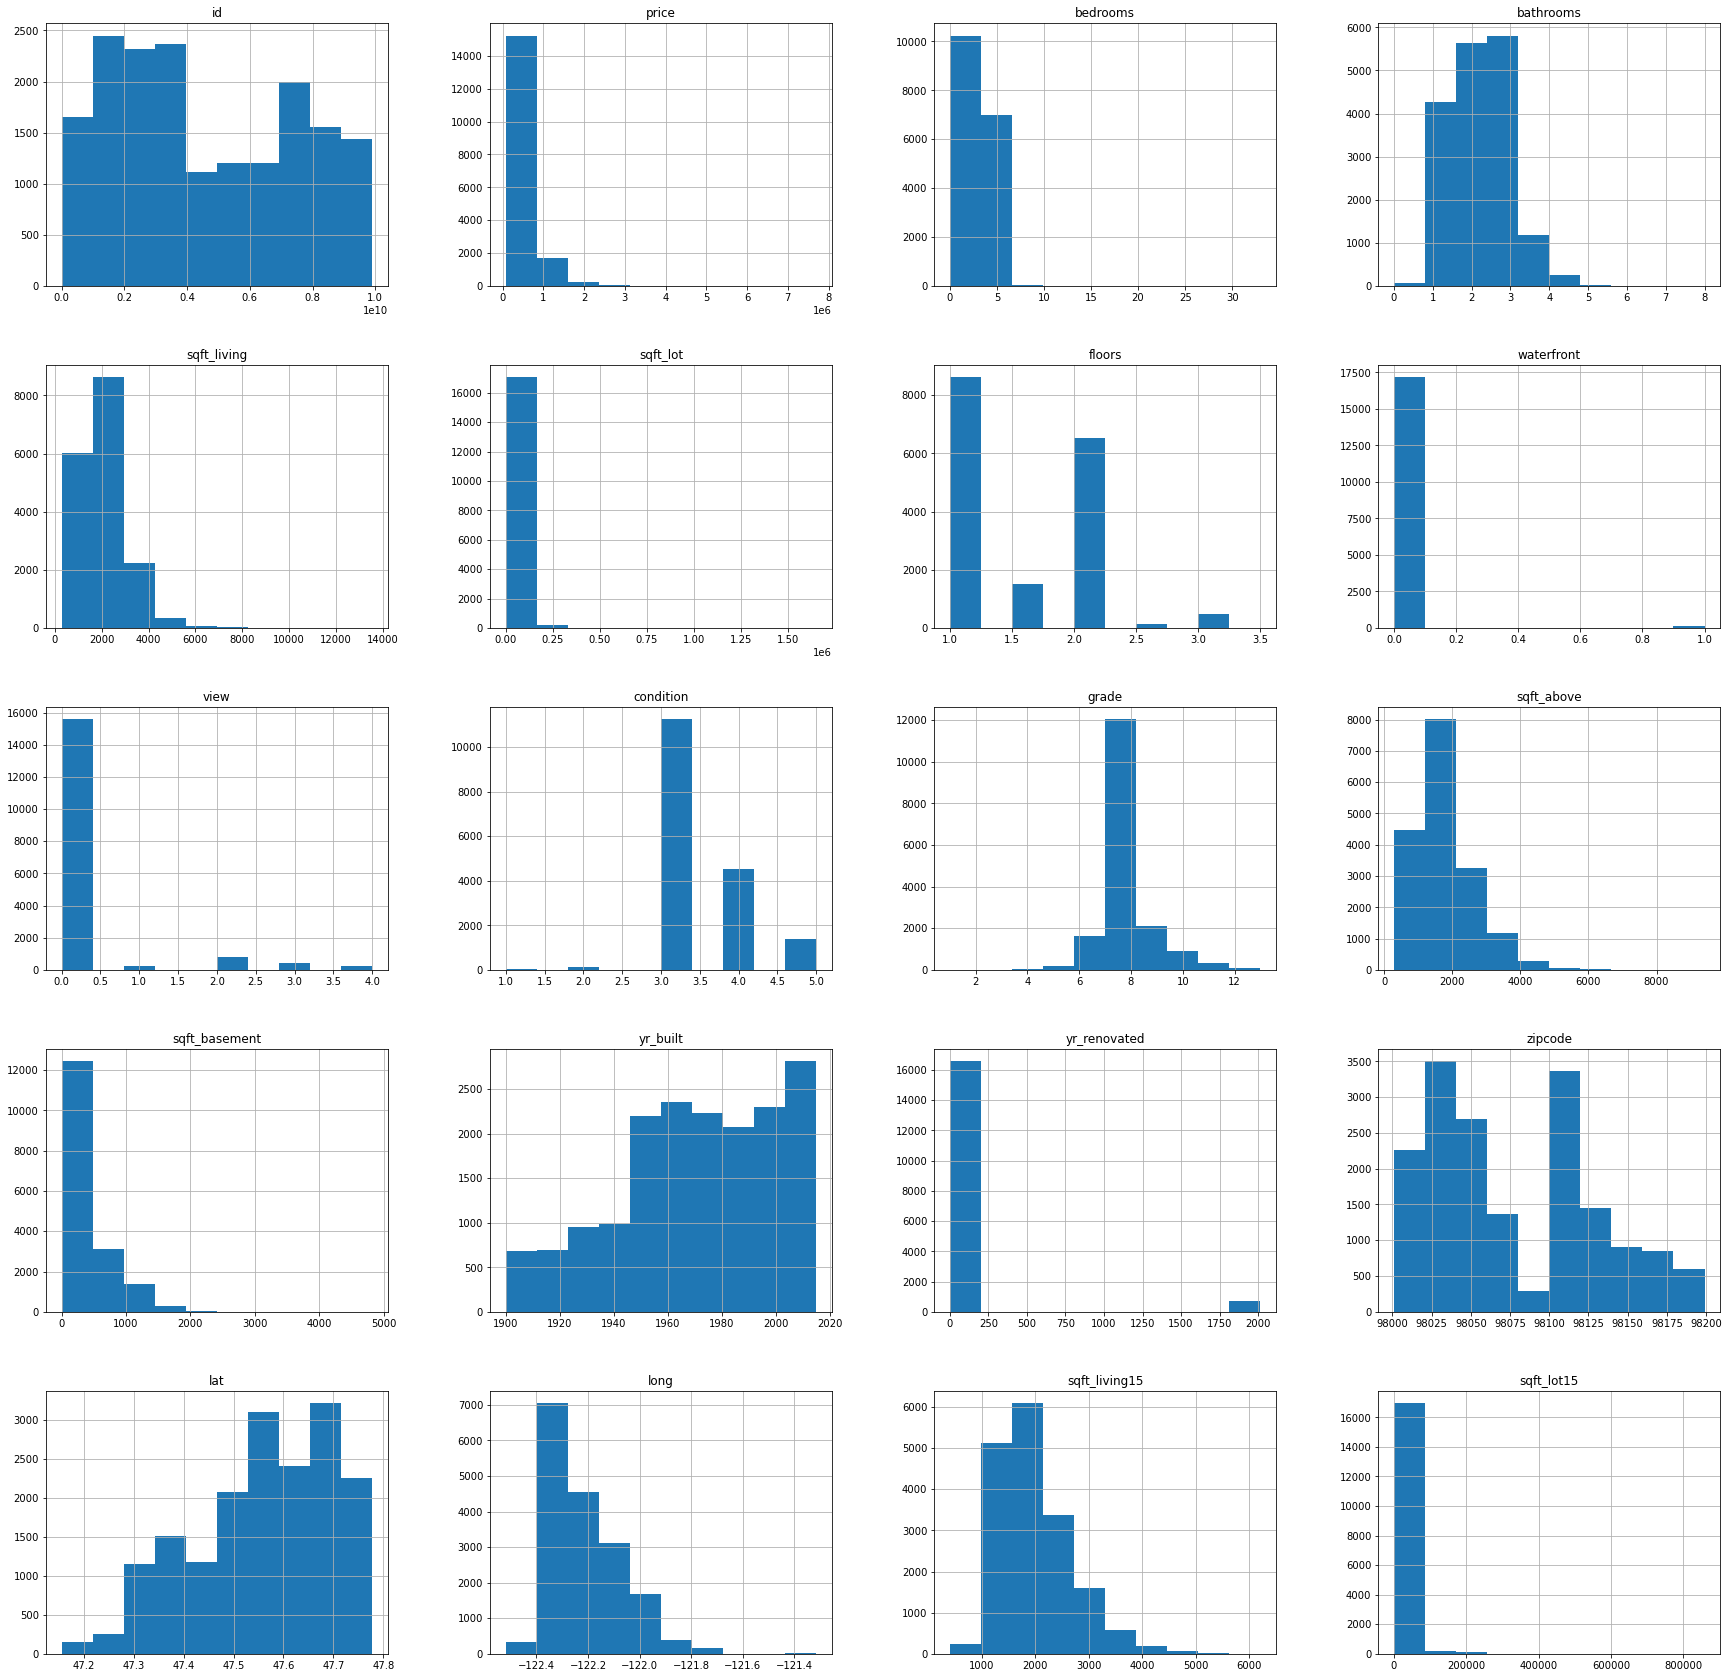

In [7]:
df.hist(figsize=(30,30));

In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [9]:
df['id'].value_counts()

1232000810    2
3558900590    2
3323059027    2
3935900232    2
3630120700    2
             ..
4312700200    1
7695370160    1
2473420070    1
9842300095    1
1777500160    1
Name: id, Length: 17176, dtype: int64

In [10]:
df[df.duplicated(subset='id',keep=False)].sort_values(['id','date'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
11635,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
2885,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0,0,3,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
12930,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
3737,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0,3,6,840,0,1925,0,98055,47.4840,-122.211,1480,6969
3716,109200390,2014-08-20,245000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
14144,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0,0,4,7,1480,0,1980,0,98023,47.2977,-122.367,1830,6956
6958,251300110,2014-07-31,225000.0,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017
1768,251300110,2015-01-14,358000.0,3,2.25,2510,12013,2.0,0,0,3,8,2510,0,1988,0,98003,47.3473,-122.314,1870,8017
4662,324000530,2014-07-08,201500.0,3,1.00,1320,5000,1.5,0,0,3,7,1320,0,1912,0,98116,47.5711,-122.386,1320,4179
10009,324000530,2015-03-23,459000.0,3,1.00,1320,5000,1.5,0,0,3,7,1320,0,1912,0,98116,47.5711,-122.386,1320,4179


In [11]:
df[df.duplicated(subset='id',keep='first')].price.mean(), df[df.duplicated(subset='id',keep='last')].price.mean()

(410548.5789473684, 409554.9210526316)

In [12]:
st.ttest_ind(df[df.duplicated(subset='id',keep='first')].price, df[df.duplicated(subset='id',keep='last')].price)

Ttest_indResult(statistic=0.026474180309901355, pvalue=0.9789024892115908)

In [13]:
df['second_sale'] = [1 if x == True else 0 for x in df.duplicated(subset='id', keep='last')]

In [14]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824,0.006593
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583,0.080934
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000,0.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000,0.000000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000,0.000000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000,1.000000


In [15]:
df = df.sort_values('date').reset_index().drop(['index','id'], axis=1)

In [16]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
0,2014-05-02,257950.0,3,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0
1,2014-05-02,439950.0,3,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0
2,2014-05-02,287200.0,3,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0
3,2014-05-02,260000.0,4,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0
4,2014-05-02,459990.0,3,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0


In [17]:
df.groupby('bathrooms').size()

bathrooms
0.00       8
0.50       3
0.75      52
1.00    3100
1.25       6
1.50    1168
1.75    2431
2.00    1549
2.25    1666
2.50    4322
2.75     896
3.00     592
3.25     455
3.50     591
3.75     135
4.00     107
4.25      64
4.50      76
4.75      16
5.00      17
5.25      11
5.50       7
5.75       3
6.00       6
6.25       2
6.50       1
6.75       2
7.50       1
7.75       1
8.00       2
dtype: int64

In [18]:
df['bathrooms'] = [1 if x <= 1.25 else (4 if x >=4 else x) for x in df.bathrooms]

In [19]:
df[df['bedrooms']==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
2809,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,0


In [20]:
df.loc[2809,'bedrooms'] = 3

In [21]:
df.groupby('bedrooms').size()

bedrooms
0       12
1      160
2     2204
3     7865
4     5488
5     1283
6      229
7       30
8       10
9        5
10       3
11       1
dtype: int64

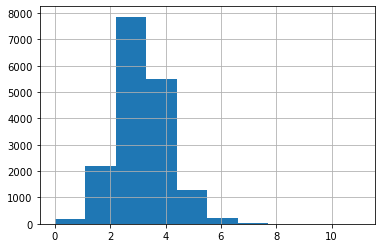

In [22]:
df.bedrooms.hist();

In [23]:
df[df['bedrooms']==0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
2097,2014-06-12,1095000.0,0,1.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0
2757,2014-06-24,1295650.0,0,1.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,0
5123,2014-08-05,288000.0,0,1.5,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,0
7669,2014-09-25,240000.0,0,2.5,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,0
7720,2014-09-26,142000.0,0,1.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,0
8007,2014-10-02,228000.0,0,1.0,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,0
9214,2014-10-29,265000.0,0,1.0,384,213444,1.0,0,0,3,4,384,0,2003,0,98070,47.4177,-122.491,1920,224341,0
10064,2014-11-17,339950.0,0,2.5,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,0
11500,2014-12-23,235000.0,0,1.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0
12654,2015-02-05,380000.0,0,1.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,0


In [24]:
df['bedrooms'] = [6 if x >=6 else x for x in df.bathrooms]

In [25]:
df.groupby(pd.Grouper(key='date', freq='M')).mean().price

date
2014-05-31    550740.787070
2014-06-30    561750.456361
2014-07-31    545195.457694
2014-08-31    539761.679052
2014-09-30    526573.607349
2014-10-31    540855.801072
2014-11-30    528512.076256
2014-12-31    526432.541880
2015-01-31    515932.273990
2015-02-28    508686.988889
2015-03-31    537872.878342
2015-04-30    561916.902993
2015-05-31    561369.578218
Freq: M, Name: price, dtype: float64

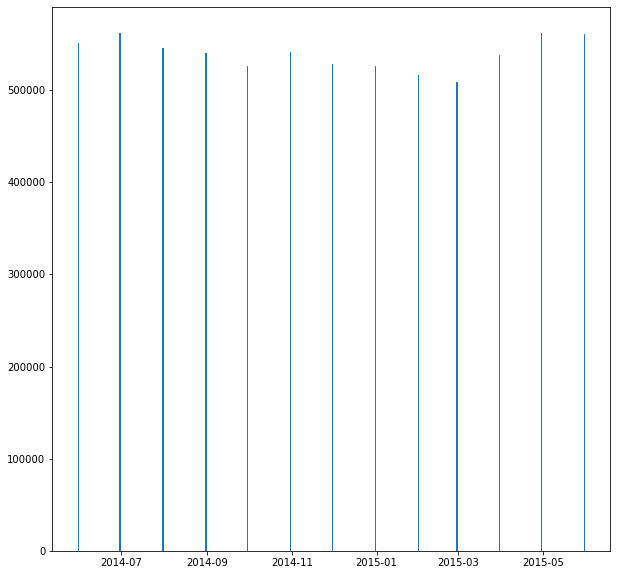

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
ax.bar(x=df.groupby(pd.Grouper(key='date', freq='M')).mean().price.index, height =df.groupby(pd.Grouper(key='date', freq='M')).mean().price);

In [27]:
df.groupby(pd.Grouper(key='date', freq='M')).size()

date
2014-05-31    1423
2014-06-30    1753
2014-07-31    1761
2014-08-31    1561
2014-09-30    1388
2014-10-31    1493
2014-11-30    1154
2014-12-31    1170
2015-01-31     792
2015-02-28     990
2015-03-31    1496
2015-04-30    1804
2015-05-31     505
Freq: M, dtype: int64

In [28]:
df[df['date'] <= pd.to_datetime('2014-05-31')]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale
0,2014-05-02,257950.0,1.75,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0
1,2014-05-02,439950.0,2.50,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0
2,2014-05-02,287200.0,3.00,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0
3,2014-05-02,260000.0,2.00,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0
4,2014-05-02,459990.0,2.50,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,2014-05-31,587000.0,2.50,2.50,2550,6256,2.0,0,0,3,9,2550,0,1992,0,98072,47.7742,-122.166,2460,8256,0
1419,2014-05-31,615000.0,2.25,2.25,1760,1146,3.0,0,0,3,9,1760,0,2014,0,98122,47.6073,-122.304,1346,3472,0
1420,2014-05-31,660000.0,2.25,2.25,2675,40910,2.0,0,0,3,8,2675,0,1984,0,98075,47.5916,-122.055,2300,39438,0
1421,2014-05-31,289950.0,2.50,2.50,1960,3480,2.0,0,0,3,7,1960,0,2004,0,98056,47.4802,-122.180,2560,3500,0


In [29]:
 df[(df['date'] >= pd.to_datetime('2015-04-01')) & (df['date'] <= pd.to_datetime('2014-04-30'))].price

Series([], Name: price, dtype: float64)

In [30]:
st.f_oneway(df[df['date'] <= pd.to_datetime('2014-05-31')].price,
           df[(df['date'] >= pd.to_datetime('2014-06-01')) & (df['date'] <= pd.to_datetime('2014-06-30'))].price,
           df[(df['date'] >= pd.to_datetime('2014-07-01')) & (df['date'] <= pd.to_datetime('2014-07-31'))].price,
           df[(df['date'] >= pd.to_datetime('2014-08-01')) & (df['date'] <= pd.to_datetime('2014-08-31'))].price,
           df[(df['date'] >= pd.to_datetime('2014-09-01')) & (df['date'] <= pd.to_datetime('2014-09-30'))].price,
           df[(df['date'] >= pd.to_datetime('2014-10-01')) & (df['date'] <= pd.to_datetime('2014-10-31'))].price,
           df[(df['date'] >= pd.to_datetime('2014-11-01')) & (df['date'] <= pd.to_datetime('2014-11-30'))].price,
           df[(df['date'] >= pd.to_datetime('2014-12-01')) & (df['date'] <= pd.to_datetime('2014-12-31'))].price,
           df[(df['date'] >= pd.to_datetime('2015-01-01')) & (df['date'] <= pd.to_datetime('2015-01-31'))].price,
           df[(df['date'] >= pd.to_datetime('2015-02-01')) & (df['date'] <= pd.to_datetime('2015-02-28'))].price,
           df[(df['date'] >= pd.to_datetime('2015-03-01')) & (df['date'] <= pd.to_datetime('2015-03-31'))].price,
           df[(df['date'] >= pd.to_datetime('2015-04-01')) & (df['date'] <= pd.to_datetime('2015-04-30'))].price,
           df[df['date'] >= pd.to_datetime('2015-05-01')].price)

F_onewayResult(statistic=2.504409911324381, pvalue=0.0027582725637271487)

In [31]:
st.ttest_ind(df[df['waterfront']==0].price, df[df['waterfront']==1].price)

Ttest_indResult(statistic=-37.72330429549608, pvalue=2.465038317654299e-299)

In [32]:
df[df['waterfront']==0].price.mean(), df[df['waterfront']==1].price.mean()

(531505.1133395522, 1688486.1739130435)

In [33]:
df[df['waterfront']==0].price.size, df[df['waterfront']==1].price.size

(17152, 138)

In [34]:
df['is_renovated'] = [0 if x == 0 else 1 for x in df.yr_renovated]

In [35]:
st.ttest_ind(df[df['is_renovated']==0].price, df[df['is_renovated']==1].price)

Ttest_indResult(statistic=-15.544856792041145, pvalue=4.007705820364685e-54)

In [36]:
df[df['is_renovated']==0].price.mean(), df[df['is_renovated']==1].price.mean()

(531563.548659744, 750093.9063360882)

In [37]:
df['house_age'] = [2015 - x for x in df.yr_built]

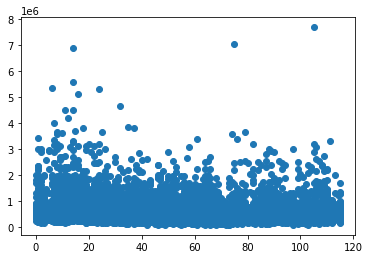

In [38]:
fig, ax = plt.subplots()
ax.scatter(x = df.house_age, y = df.price);

In [39]:
df['has_basement'] = [0 if x == 0 else 1 for x in df.sqft_basement]

In [40]:
st.ttest_ind(df[df['has_basement']==0].price, df[df['has_basement']==1].price)

Ttest_indResult(statistic=-23.641892563316105, pvalue=1.2107663322174255e-121)

In [41]:
df[df['has_basement']==0].price.mean(), df[df['has_basement']==1].price.mean()

(487510.2989317055, 622734.1789597414)

In [42]:
df.has_basement.sum()

6806

In [43]:
df.groupby('zipcode').mean().price.sort_values(ascending=False)

zipcode
98039    2.202790e+06
98004    1.396883e+06
98040    1.183018e+06
98112    1.119458e+06
98102    9.336715e+05
98109    8.759879e+05
98119    8.712724e+05
98105    8.687880e+05
98006    8.494588e+05
98005    8.088476e+05
98033    8.027175e+05
98075    7.939692e+05
98199    7.871469e+05
98074    6.912549e+05
98053    6.773342e+05
98077    6.768898e+05
98177    6.552490e+05
98052    6.460591e+05
98008    6.407492e+05
98144    6.213533e+05
98122    6.192377e+05
98029    6.156723e+05
98116    6.150221e+05
98115    6.137439e+05
98027    6.072946e+05
98007    5.975536e+05
98024    5.909915e+05
98103    5.897893e+05
98107    5.834824e+05
98117    5.701880e+05
98072    5.667307e+05
98136    5.659156e+05
98065    5.272174e+05
98034    5.238643e+05
98070    4.956727e+05
98059    4.943730e+05
98011    4.906393e+05
98166    4.793758e+05
98125    4.752226e+05
98028    4.684170e+05
98014    4.562057e+05
98045    4.313185e+05
98019    4.284222e+05
98126    4.250761e+05
98010    4.248736e+05
98

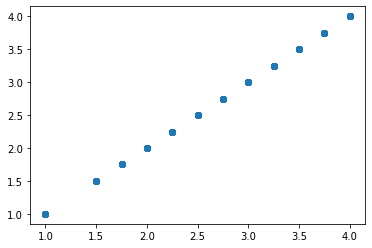

In [44]:
fig, ax = plt.subplots()
ax.scatter(x = df.bedrooms, y=df.bathrooms);

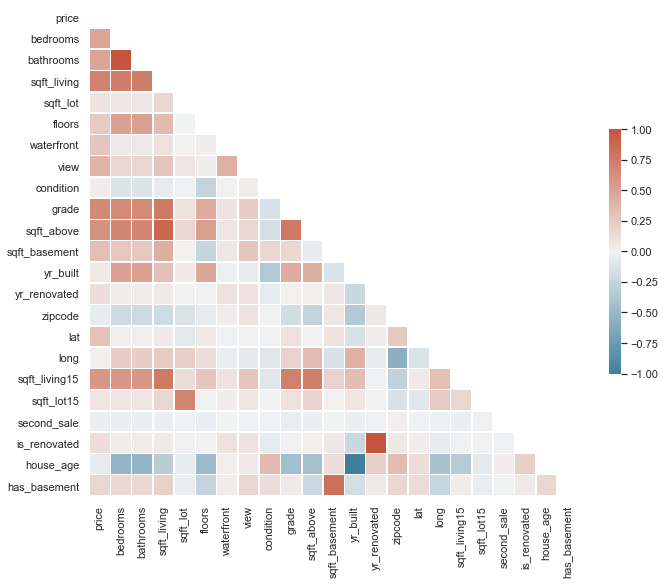

In [45]:
sns.set_theme(style="white")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [46]:
df.date[0].strftime('%Y-%m')

'2014-05'

In [47]:
df['date'] = [x.strftime('%Y-%m') for x in df.date]

In [48]:
df['date'] = pd.to_datetime(df.date)

In [49]:
type(df.date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [50]:
df['season'] = ['Winter' if int(x.strftime('%m')) in list([1,2,12]) 
                else ('Spring' if int(x.strftime('%m')) in range(3,6)
                else ('Summer' if int(x.strftime('%m')) in range(6,9)
                else 'Fall')) for x in df.date]


In [51]:
df.groupby('season').mean().price

season
Fall      532412.593309
Spring    551941.793420
Summer    549242.508768
Winter    517664.144309
Name: price, dtype: float64

In [52]:
ols(formula='price~C(zipcode)+sqft_living+C(waterfront)+C(is_renovated)+C(bathrooms)+C(grade)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     841.2
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:32:05   Log-Likelihood:            -2.3148e+05
No. Observations:               17290   AIC:                         4.631e+05
Df Residuals:                   17195   BIC:                         4.639e+05
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -8.573e+04    1.6e+05     -0.537      0.591   -3.99e+05    2.27e+05
C(zipcode)[T.98002]   8406.1243   1.58e+04      0.533      0.594   -2.25e+04    3.93e+04
C(zipcode)[T.98003]  -4229.2789   1.42e+04     -0.299      0.765    -3.2e+04    2.35e+04
C(zipcode)[T.98004]   7.824e+05   1.41e+04     55.567      0.000    7.55e+05     8.1e+05
C(zipcode)[T.98005]   3.035e+05   1.64e+04     18.469      0.000    2.71e+05    3.36e+05
C(zipcode)[T.98006]   2.721e+05   1.25e+04     21.723      0.000    2.48e+05    2.97e+05
C(zipcode)[T.98007]   2.519e+05   1.72e+04     14.680      0.000    2.18e+05    2.86e+05
C(zipcode)[T.98008]   2.805e+05   1.41e+04     19.834      0.000    2.53e+05    3.08e+05
C(zipcode)[T.98010]   6.742e+04   2.07e+04      3.261      0.001    2.69e+04    1.08e+05
C(zipcode)[T.98011]   1.326e+05   1.56e+04      8.515      0.000    1.02e+05    1.63e+05
C(zipcode)[T.98014]   1.074e+05   1.84e+04      5.847      0.000    7.14e+04    1.43e+05
C(zipcode)[T.98019]   8.826e+04   1.62e+04      5.458      0.000    5.66e+04     1.2e+05
C(zipcode)[T.98022]   3.988e+04   1.49e+04      2.674      0.008    1.06e+04    6.91e+04
C(zipcode)[T.98023]  -3.186e+04   1.22e+04     -2.602      0.009   -5.59e+04   -7858.015
C(zipcode)[T.98024]   1.801e+05   2.19e+04      8.207      0.000    1.37e+05    2.23e+05
C(zipcode)[T.98027]   1.601e+05   1.29e+04     12.446      0.000    1.35e+05    1.85e+05
C(zipcode)[T.98028]   1.349e+05   1.42e+04      9.466      0.000    1.07e+05    1.63e+05
C(zipcode)[T.98029]   2.095e+05   1.39e+04     15.129      0.000    1.82e+05    2.37e+05
C(zipcode)[T.98030]   1633.5804   1.46e+04      0.112      0.911    -2.7e+04    3.02e+04
C(zipcode)[T.98031]   1.569e+04   1.43e+04      1.096      0.273   -1.24e+04    4.38e+04
C(zipcode)[T.98032]   3995.5731   1.82e+04      0.219      0.827   -3.17e+04    3.97e+04
C(zipcode)[T.98033]   3.593e+05   1.27e+04     28.403      0.000    3.35e+05    3.84e+05
C(zipcode)[T.98034]   2.041e+05   1.21e+04     16.878      0.000     1.8e+05    2.28e+05
C(zipcode)[T.98038]   3.673e+04    1.2e+04      3.060      0.002    1.32e+04    6.03e+04
C(zipcode)[T.98039]   1.207e+06   2.65e+04     45.524      0.000    1.15e+06    1.26e+06
C(zipcode)[T.98040]   5.113e+05   1.43e+04     35.841      0.000    4.83e+05    5.39e+05
C(zipcode)[T.98042]   1.557e+04   1.21e+04      1.282      0.200   -8235.022    3.94e+04
C(zipcode)[T.98045]   1.057e+05   1.52e+04      6.958      0.000    7.59e+04    1.35e+05
C(zipcode)[T.98052]   2.342e+05   1.19e+04     19.612      0.000    2.11e+05    2.58e+05
C(zipcode)[T.98053]   2.076e+05   1.29e+04     16.057      0.000    1.82e+05    2.33e+05
C(zipcode)[T.98055]   4.202e+04   1.44e+04      2.916      0.004    1.38e+04    7.03e+04
C(zipcode)[T.98056]   1.009e+05   1.28e+04      7.897    

In [53]:
ols(formula='price~C(zipcode)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     167.4
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:32:05   Log-Likelihood:            -2.4193e+05
No. Observations:               17290   AIC:                         4.840e+05
Df Residuals:                   17220   BIC:                         4.845e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             2.82e+05   1.72e+04     16.421      0.000    2.48e+05    3.16e+05
C(zipcode)[T.98002] -4.971e+04   2.88e+04     -1.727      0.084   -1.06e+05    6701.740
C(zipcode)[T.98003]  8763.9215   2.59e+04      0.339      0.735   -4.19e+04    5.95e+04
C(zipcode)[T.98004]  1.115e+06   2.55e+04     43.787      0.000    1.06e+06    1.16e+06
C(zipcode)[T.98005]  5.268e+05   2.99e+04     17.629      0.000    4.68e+05    5.85e+05
C(zipcode)[T.98006]  5.675e+05   2.26e+04     25.068      0.000    5.23e+05    6.12e+05
C(zipcode)[T.98007]  3.156e+05   3.13e+04     10.073      0.000    2.54e+05    3.77e+05
C(zipcode)[T.98008]  3.588e+05   2.58e+04     13.907      0.000    3.08e+05    4.09e+05
C(zipcode)[T.98010]  1.429e+05   3.78e+04      3.783      0.000    6.88e+04    2.17e+05
C(zipcode)[T.98011]  2.086e+05   2.84e+04      7.337      0.000    1.53e+05    2.64e+05
C(zipcode)[T.98014]  1.742e+05   3.35e+04      5.196      0.000    1.08e+05     2.4e+05
C(zipcode)[T.98019]  1.464e+05   2.95e+04      4.957      0.000    8.85e+04    2.04e+05
C(zipcode)[T.98022]  2.677e+04   2.72e+04      0.985      0.324   -2.65e+04       8e+04
C(zipcode)[T.98023]  7573.8820   2.23e+04      0.339      0.735   -3.62e+04    5.14e+04
C(zipcode)[T.98024]   3.09e+05   3.98e+04      7.765      0.000    2.31e+05    3.87e+05
C(zipcode)[T.98027]  3.253e+05   2.34e+04     13.907      0.000    2.79e+05    3.71e+05
C(zipcode)[T.98028]  1.864e+05    2.6e+04      7.163      0.000    1.35e+05    2.37e+05
C(zipcode)[T.98029]  3.337e+05   2.51e+04     13.295      0.000    2.84e+05    3.83e+05
C(zipcode)[T.98030]   1.44e+04   2.67e+04      0.540      0.589   -3.79e+04    6.67e+04
C(zipcode)[T.98031]   1.86e+04   2.62e+04      0.711      0.477   -3.27e+04    6.99e+04
C(zipcode)[T.98032]  -3.04e+04   3.33e+04     -0.913      0.361   -9.56e+04    3.48e+04
C(zipcode)[T.98033]  5.207e+05    2.3e+04     22.601      0.000    4.76e+05    5.66e+05
C(zipcode)[T.98034]  2.419e+05   2.21e+04     10.955      0.000    1.99e+05    2.85e+05
C(zipcode)[T.98038]  8.642e+04   2.19e+04      3.949      0.000    4.35e+04    1.29e+05
C(zipcode)[T.98039]  1.921e+06   4.78e+04     40.147      0.000    1.83e+06    2.01e+06
C(zipcode)[T.98040]   9.01e+05   2.57e+04     35.055      0.000    8.51e+05    9.51e+05
C(zipcode)[T.98042]  2.717e+04   2.22e+04      1.224      0.221   -1.63e+04    7.07e+04
C(zipcode)[T.98045]  1.493e+05   2.78e+04      5.378      0.000    9.49e+04    2.04e+05
C(zipcode)[T.98052]  3.641e+05   2.17e+04     16.764      0.000    3.21e+05    4.07e+05
C(zipcode)[T.98053]  3.953e+05   2.35e+04     16.805      0.000    3.49e+05    4.41e+05
C(zipcode)[T.98055]  2.485e+04   2.63e+04      0.944      0.345   -2.68e+04    7.65e+04
C(zipcode)[T.98056]  1.415e+05   2.33e+04      6.066      0.000    9.58e+04    1.87e+05
C(z

In [54]:
df['yard_space'] = df.sqft_lot - (df.sqft_living / df.floors)
df['yard_space'] = [0 if x < 0 else x for x in df.yard_space]

In [55]:
df[df['yard_space'] == 0]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,is_renovated,house_age,has_basement,season,yard_space
1431,2014-06-01,610000.0,2.5,2.5,3990,3839,1.0,0,0,4,8,1990,2000,1962,0,98112,47.6236,-122.299,2090,5000,0,0,53,1,Summer,0.0
3797,2014-07-01,370000.0,1.0,1.0,1170,1105,1.0,0,0,3,7,1170,0,1965,0,98126,47.5448,-122.375,1380,1399,0,0,50,0,Summer,0.0
4916,2014-07-01,450000.0,2.5,2.5,1530,762,2.0,0,0,3,8,1050,480,2007,0,98119,47.6420,-122.374,1610,1482,0,0,8,1,Summer,0.0
10849,2014-12-01,760000.0,2.0,2.0,1780,1750,1.0,0,2,3,8,1400,380,1927,2014,98103,47.6797,-122.357,1780,3750,0,1,88,1,Winter,0.0


In [56]:
df.corr().price.yard_space

0.08025239187092187

In [57]:
df.yard_space.describe()

count    1.729000e+04
mean     1.375375e+04
std      4.221746e+04
min      0.000000e+00
25%      3.805250e+03
50%      6.157500e+03
75%      9.096000e+03
max      1.650059e+06
Name: yard_space, dtype: float64

In [58]:
df.groupby('grade').size()

grade
1        1
3        2
4       22
5      192
6     1648
7     7183
8     4848
9     2099
10     893
11     319
12      72
13      11
dtype: int64

In [59]:
df['grade'] = [5 if x <= 5 else (11 if x >=11 else x) for x in df.grade]

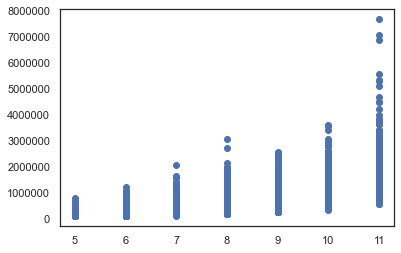

In [60]:
fig, ax = plt.subplots()
ax.scatter(df.grade, df.price)
ax.ticklabel_format(useOffset=False)
ax.ticklabel_format(style='plain');

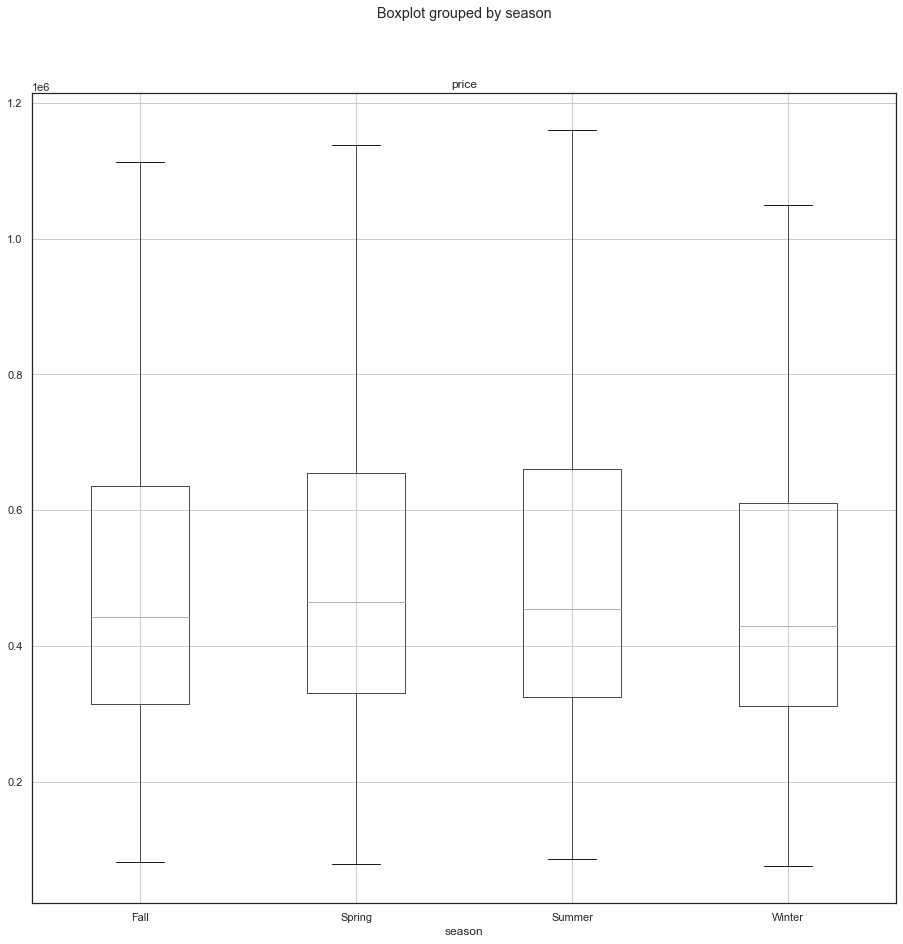

In [61]:
df.boxplot(column='price', by='season', figsize = (15,15), showfliers = False);

In [62]:
df.columns.size

26

In [63]:
df['sqft_per_floor'] = df['sqft_living']/df['floors']
df['floor_area_lot_ratio'] = df['sqft_per_floor']/df['sqft_lot']
df['living_bathroom_ratio'] = df.sqft_living/df.bathrooms
df['living_bedroom_ratio'] = df.sqft_living/df.bedrooms

In [64]:
df.replace(np.inf, 0, inplace=True)

In [65]:
df['sqft_living_log'] = [np.log(x) for x in df.sqft_living]

In [66]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,is_renovated,house_age,has_basement,season,yard_space,sqft_per_floor,floor_area_lot_ratio,living_bathroom_ratio,living_bedroom_ratio,sqft_living_log
0,2014-05-01,257950.0,1.75,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0,0,28,0,Spring,4488.0,1370.0,0.233868,782.857143,782.857143,7.222566
1,2014-05-01,439950.0,2.50,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0,0,25,0,Spring,1990.0,885.0,0.307826,708.000000,708.000000,7.478735
2,2014-05-01,287200.0,3.00,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0,0,23,1,Spring,18116.0,1850.0,0.092658,616.666667,616.666667,7.522941
3,2014-05-01,260000.0,2.00,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0,0,41,0,Spring,7145.0,1480.0,0.171594,740.000000,740.000000,7.299797
4,2014-05-01,459990.0,2.50,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0,0,2,0,Spring,4199.0,1340.0,0.241921,1072.000000,1072.000000,7.893572


In [67]:
ols(formula='price~sqft_per_floor', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     4000.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:32:05   Log-Likelihood:            -2.4457e+05
No. Observations:               17290   AIC:                         4.891e+05
Df Residuals:                   17288   BIC:                         4.892e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        1.73e+05   6352.907     27.231      0.000    1.61e+05    1.85e+05
sqft_per_floor   246.8642      3.904     63.242      0.000     239.213     254.515
==============================================================================
Omnibus:                    14450.524   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           821696.039
Skew:                           3.672   Prob(JB):                         0.00
Kurtosis:                      35.964   Cond. No.                     4.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

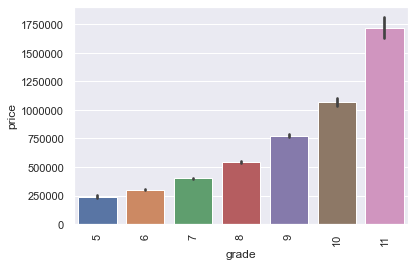

In [68]:
sns.set_style('darkgrid')
x = df['grade']
y = df['price']
fig, ax = plt.subplots()
ax = sns.barplot(x=x,y=y, data=df)
ax.ticklabel_format(style='plain', axis='y')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()


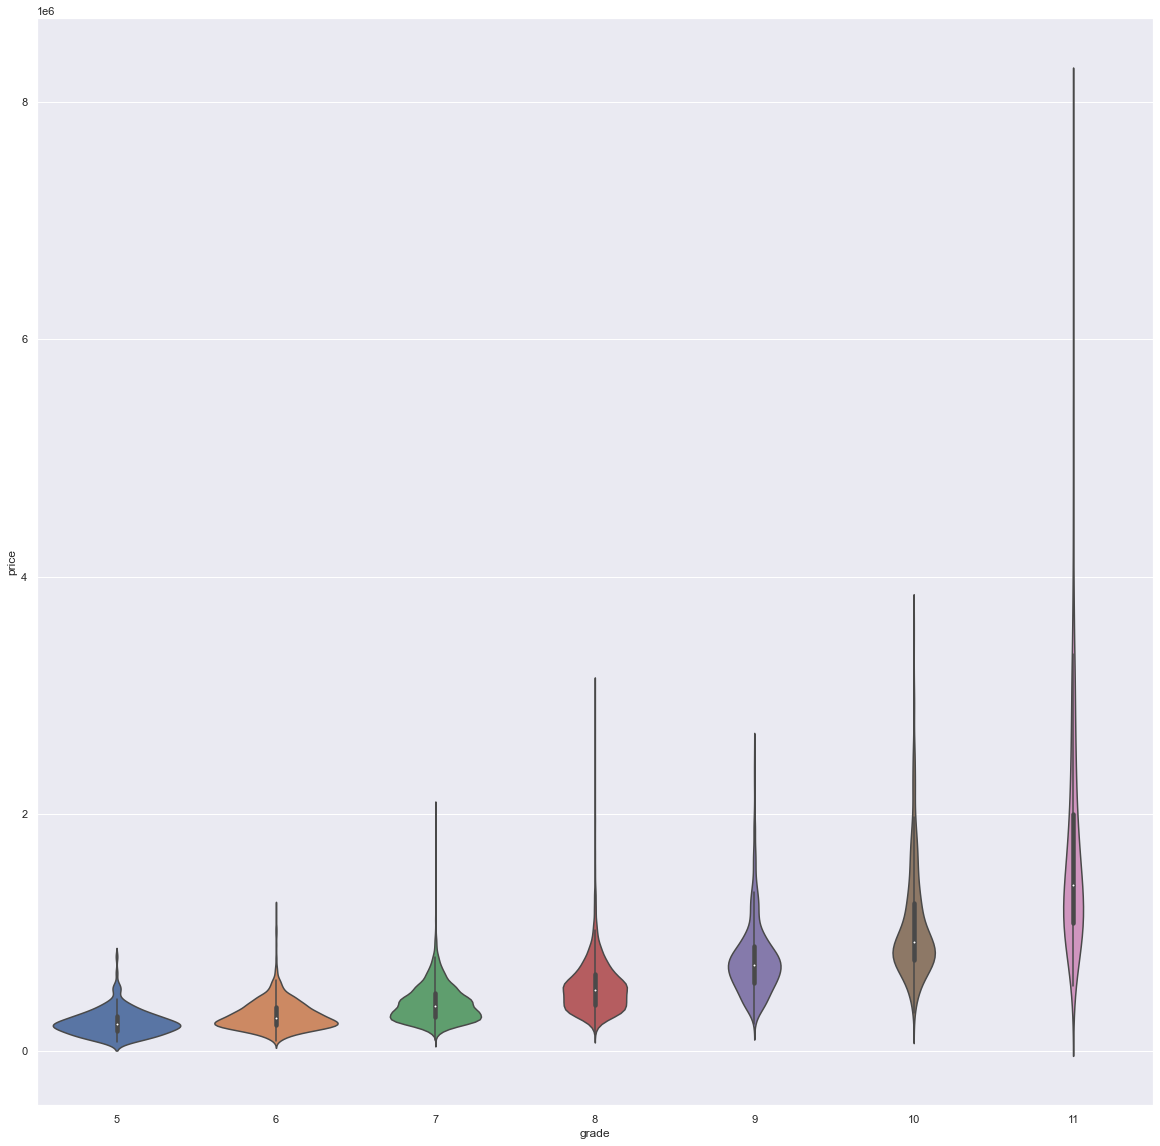

In [69]:
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.violinplot(x=df.grade, y=df.price, data=df)
plt.show();

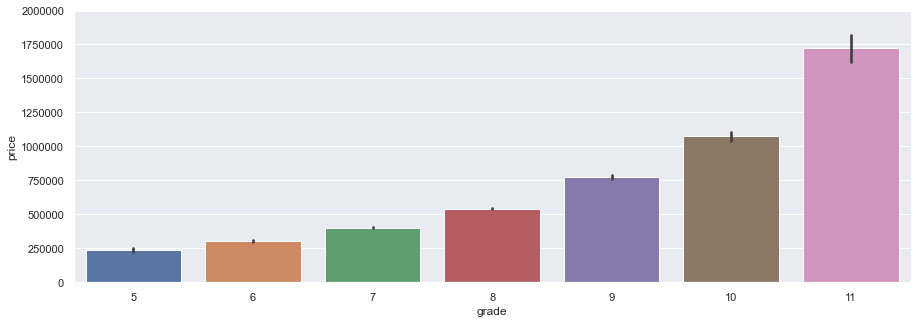

In [70]:
#df.groupby('grade').agg(['mean','median']).price
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df.grade, y=df.price, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.ylim(top=2000000);

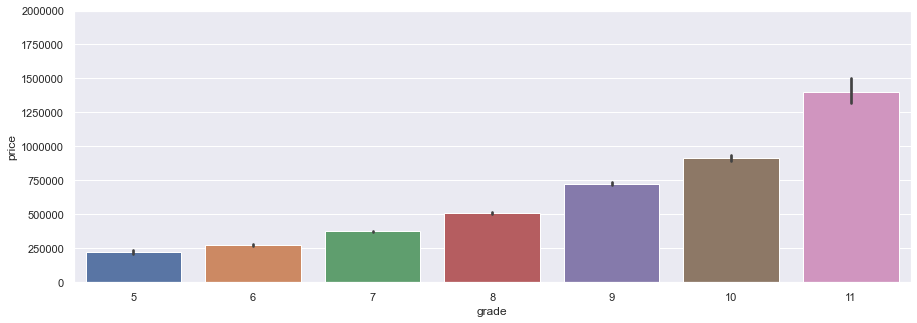

In [71]:
fig, ax = plt.subplots(figsize=(15,5))
ax= sns.barplot(x=df.grade, y=df.price, data=df, estimator=np.median)
ax.ticklabel_format(style='plain', axis='y')
plt.ylim(top=2000000);

<ipython-input-72-db3633cb2e2d>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(10,10))


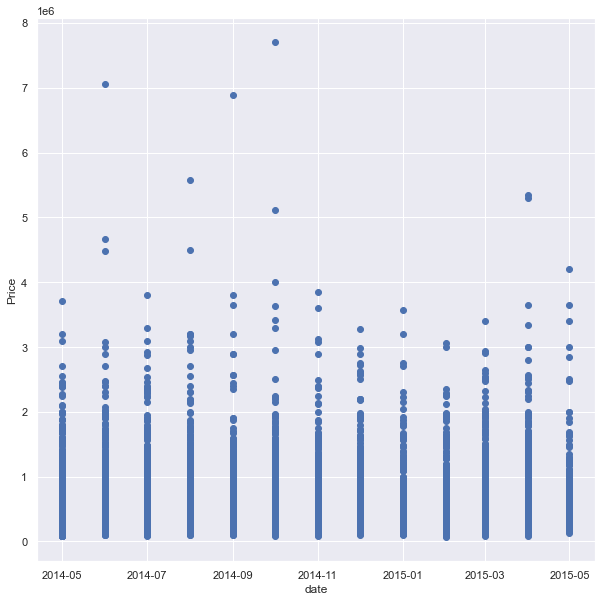

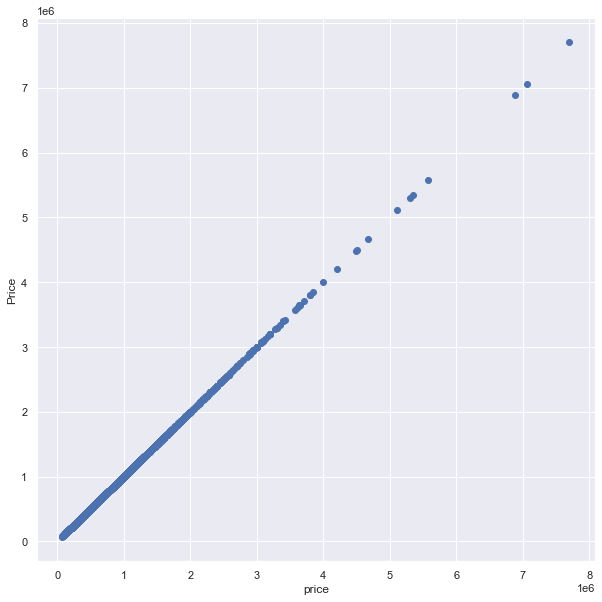

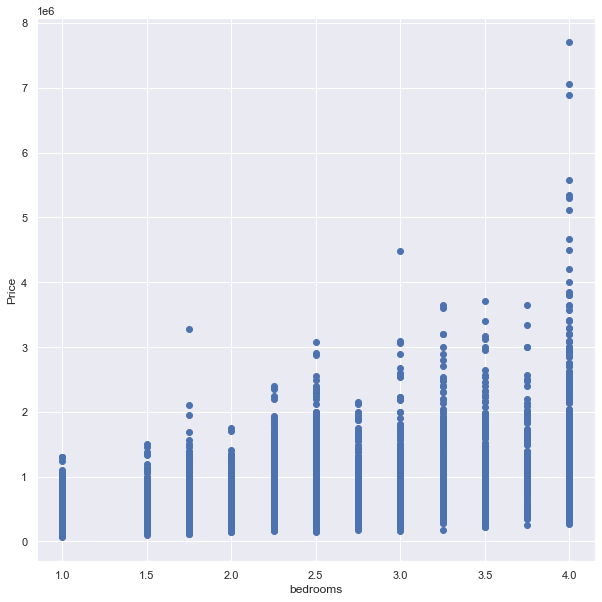

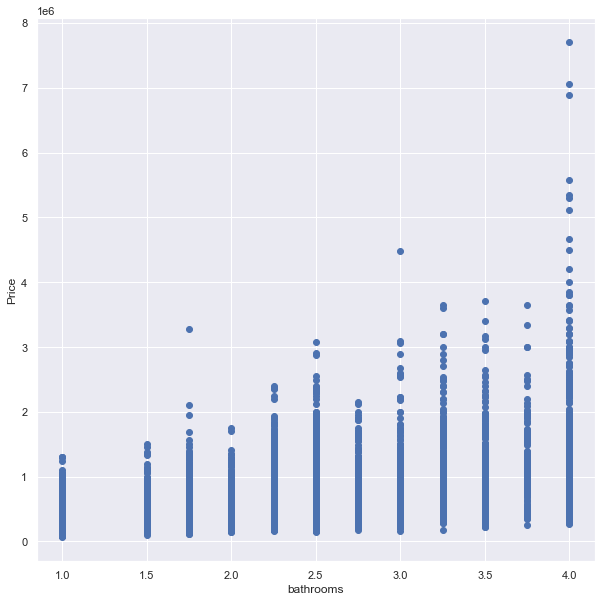

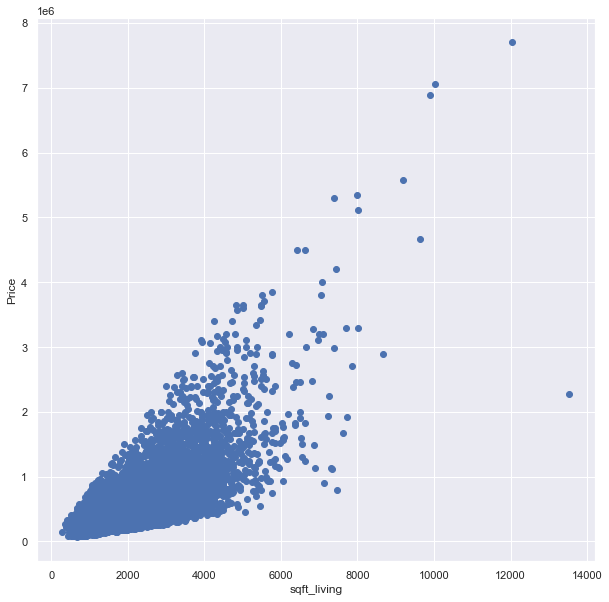

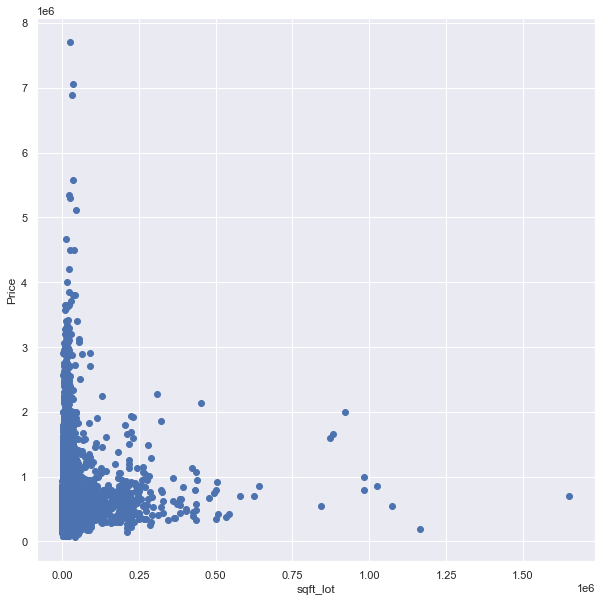

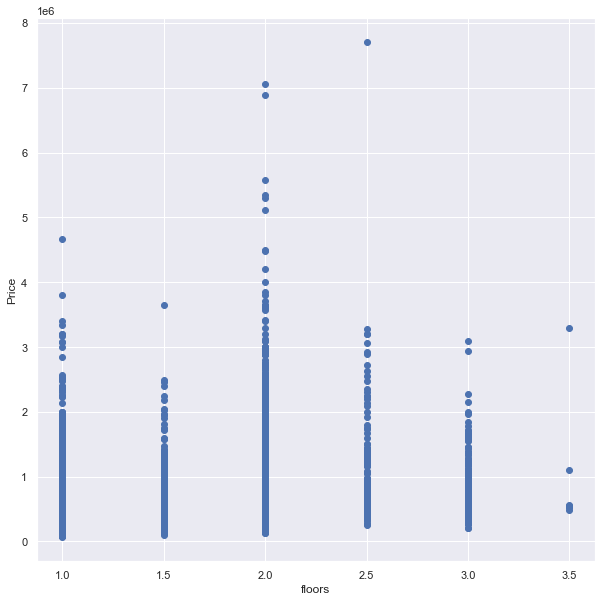

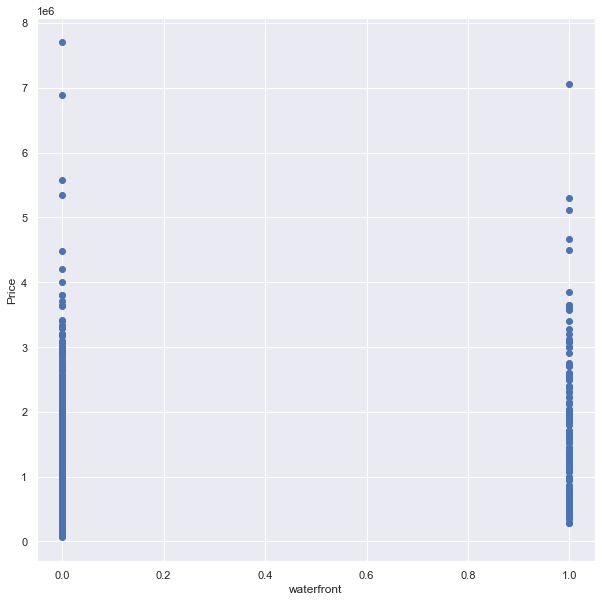

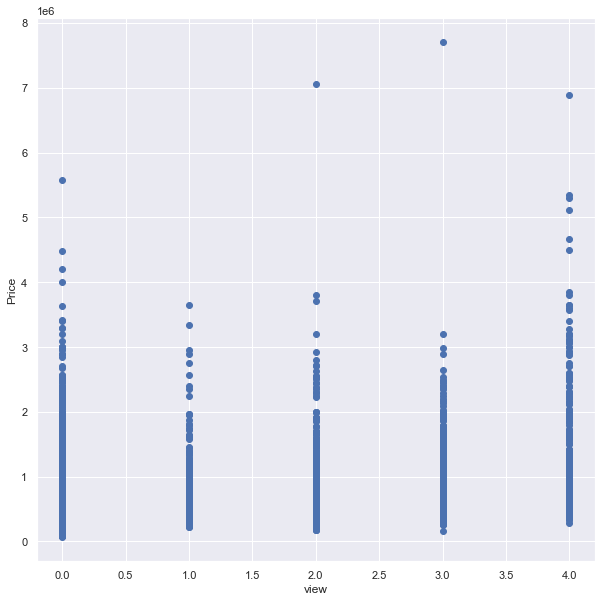

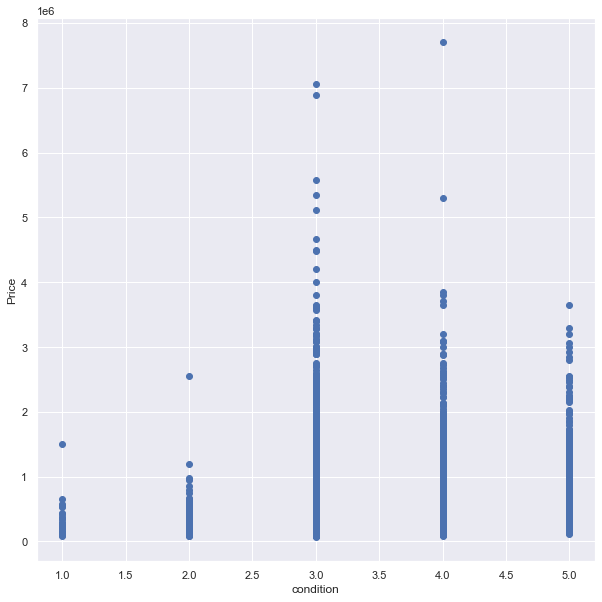

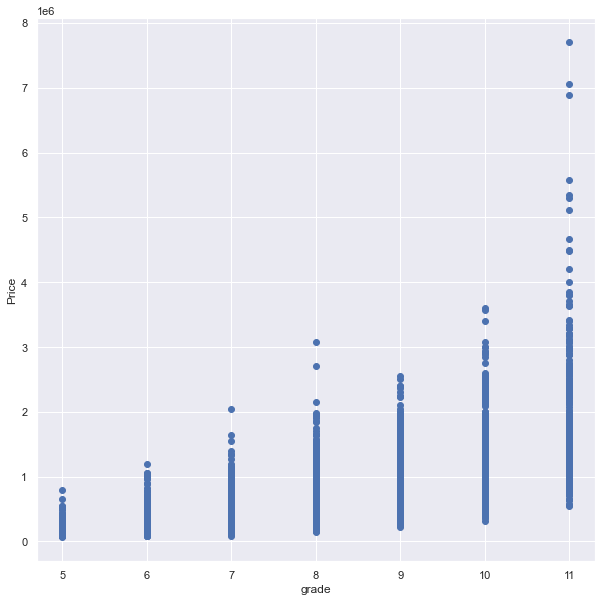

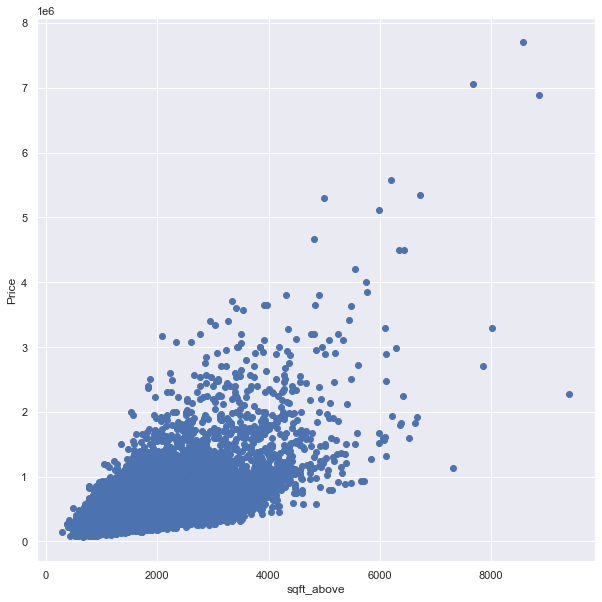

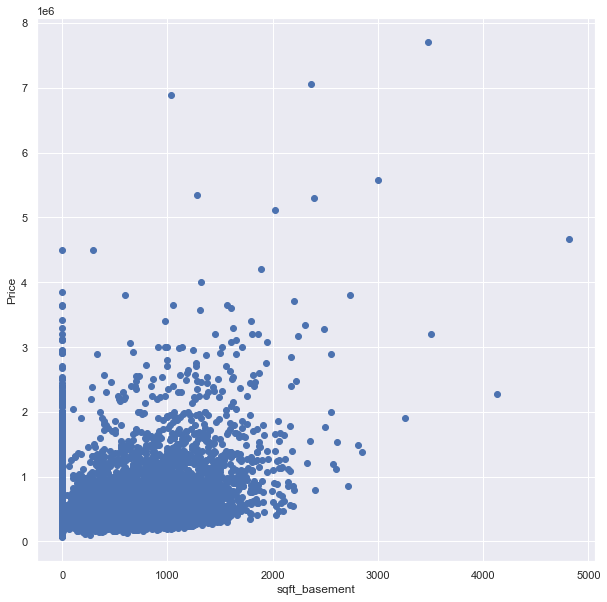

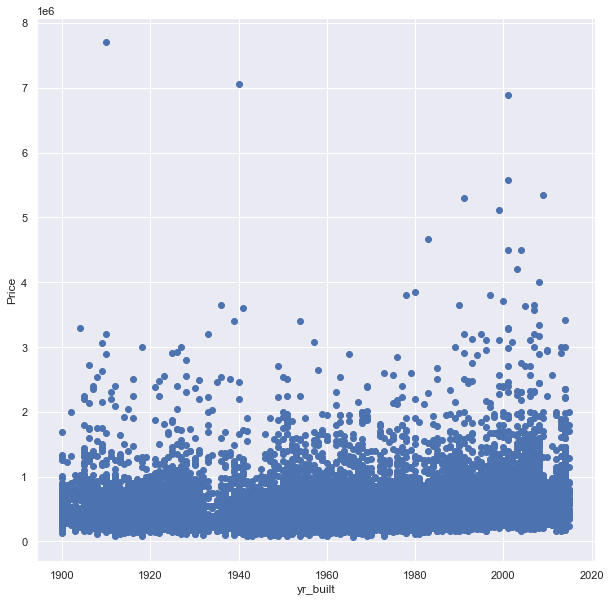

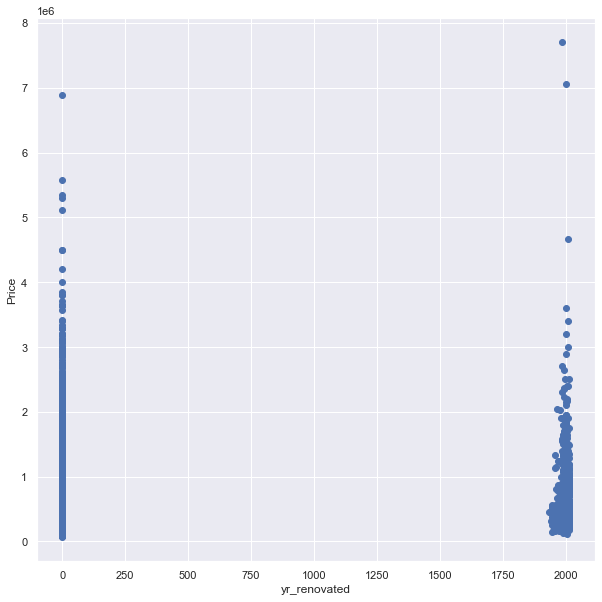

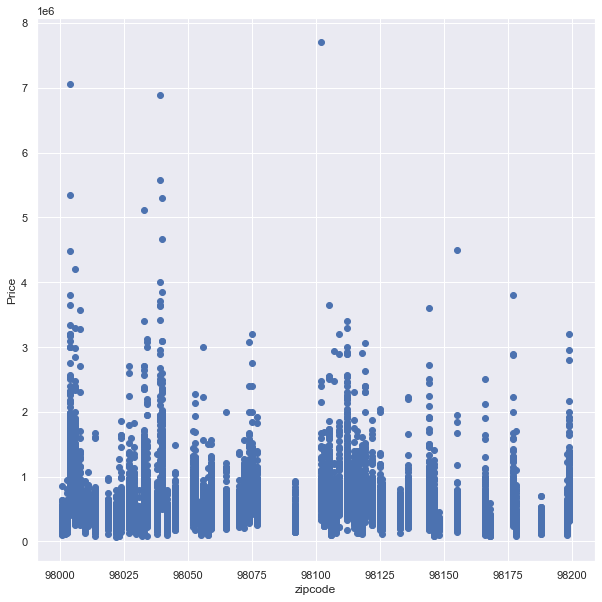

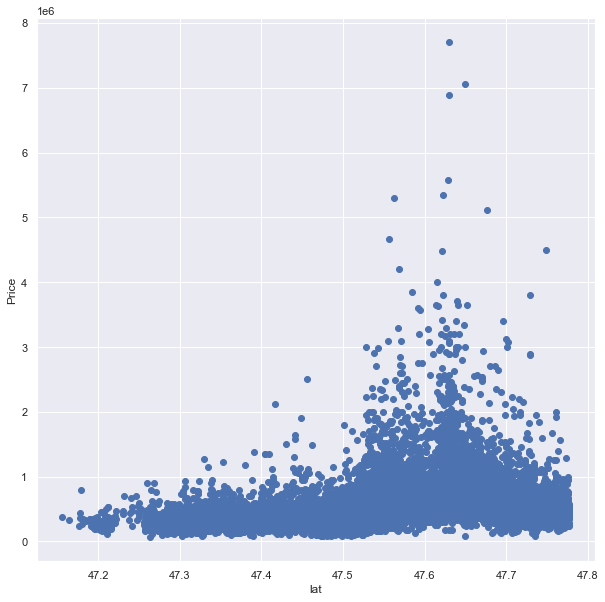

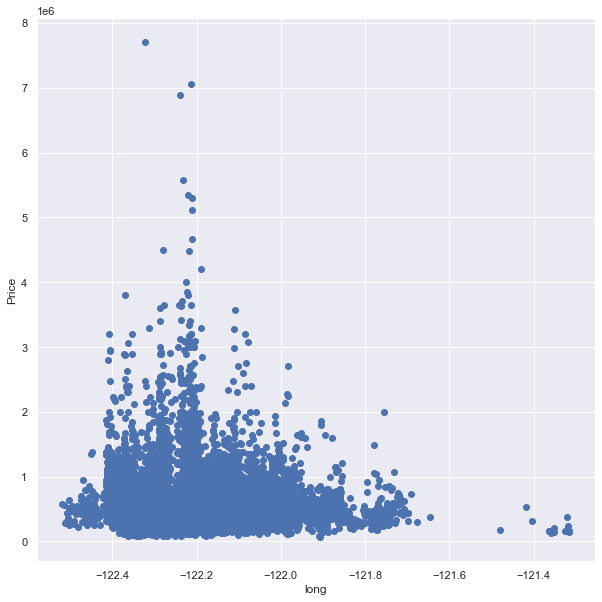

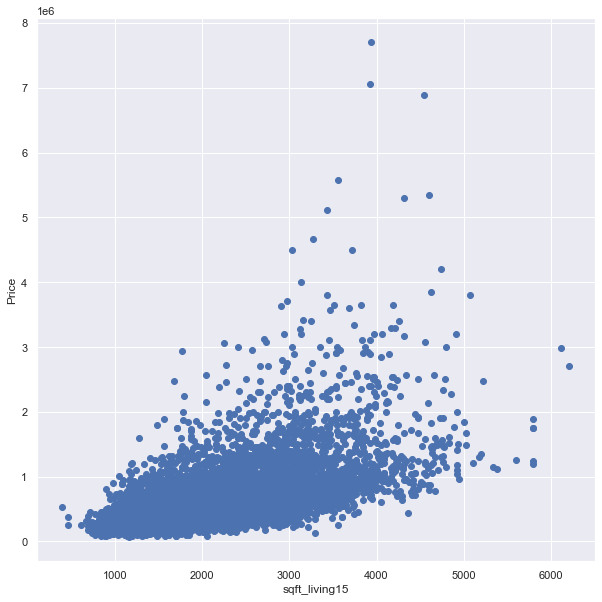

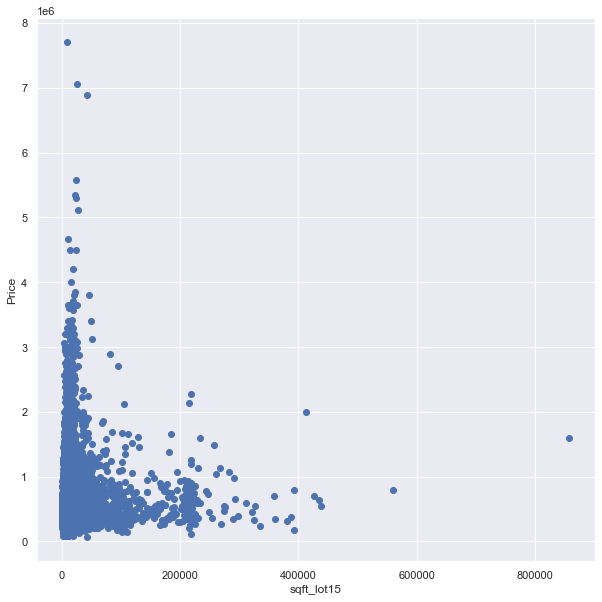

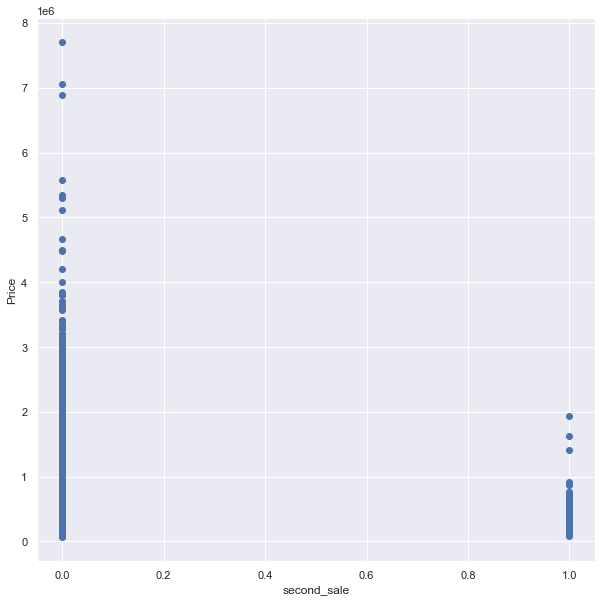

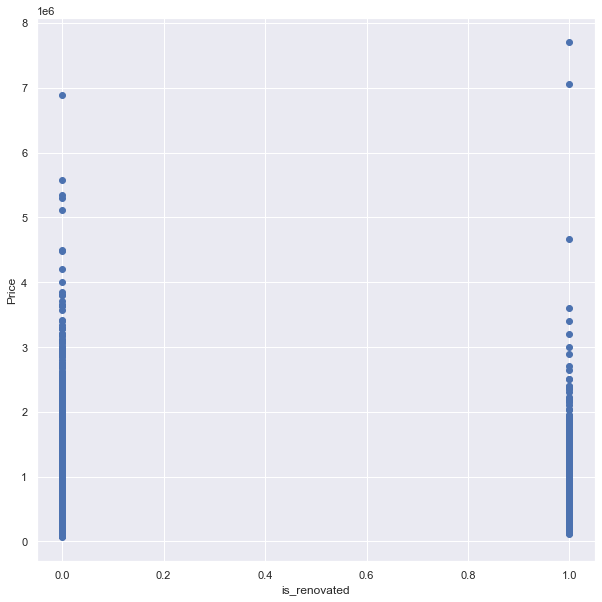

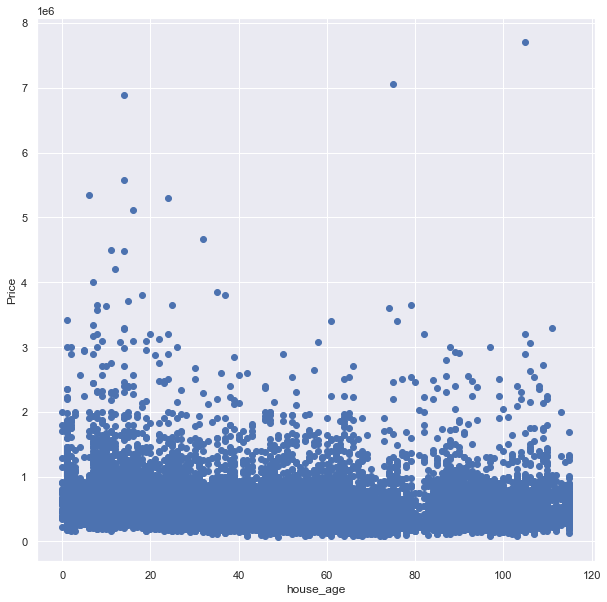

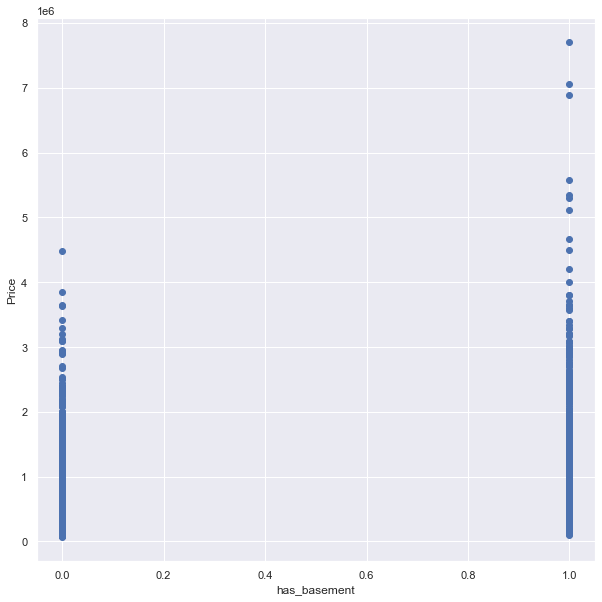

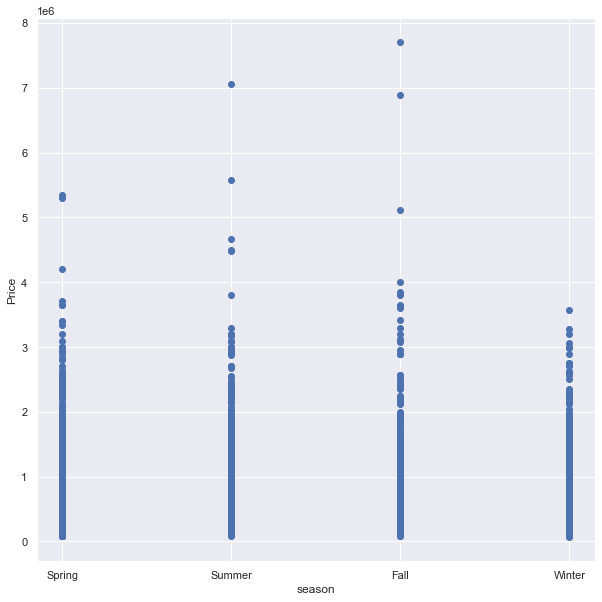

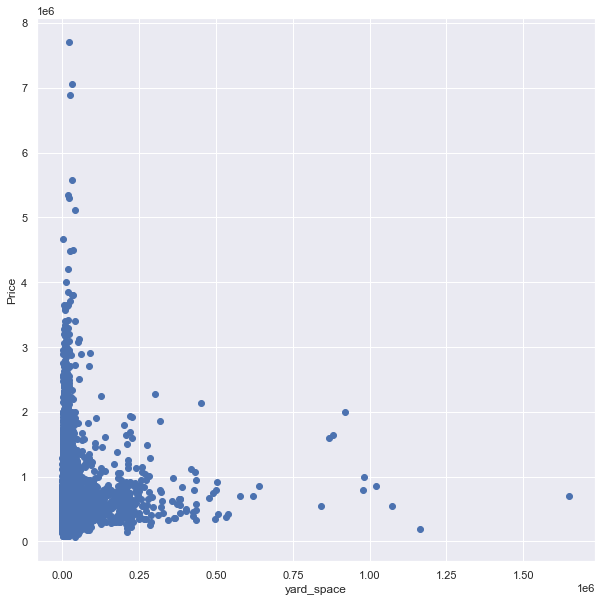

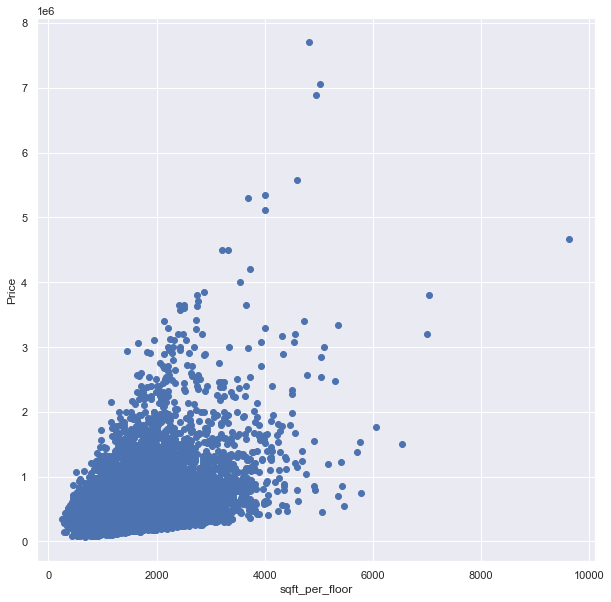

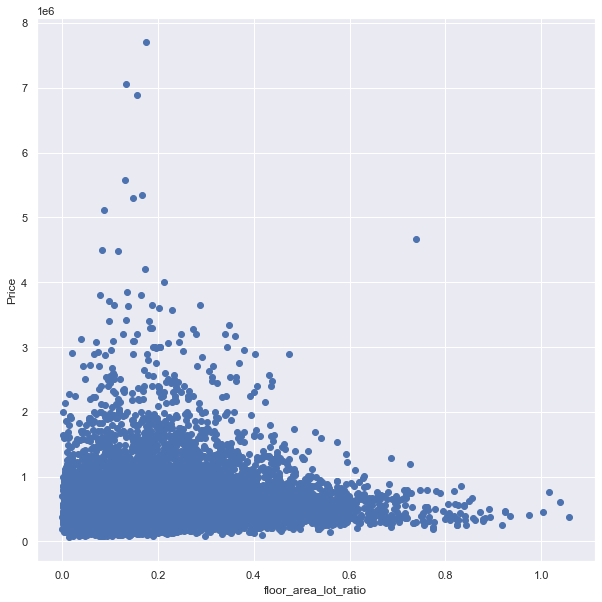

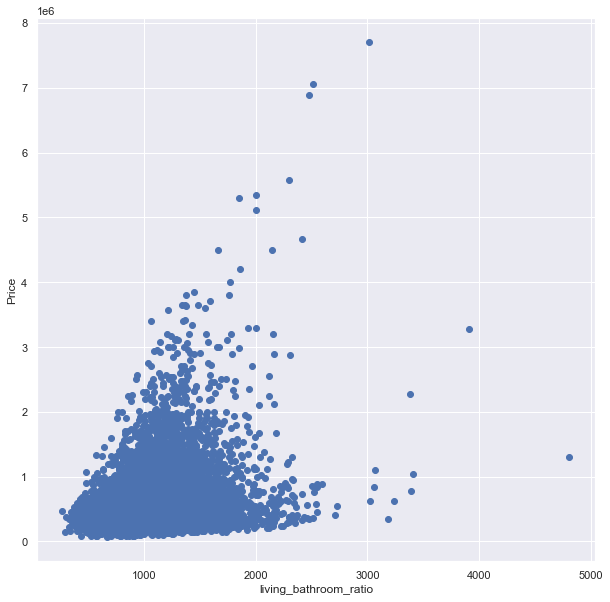

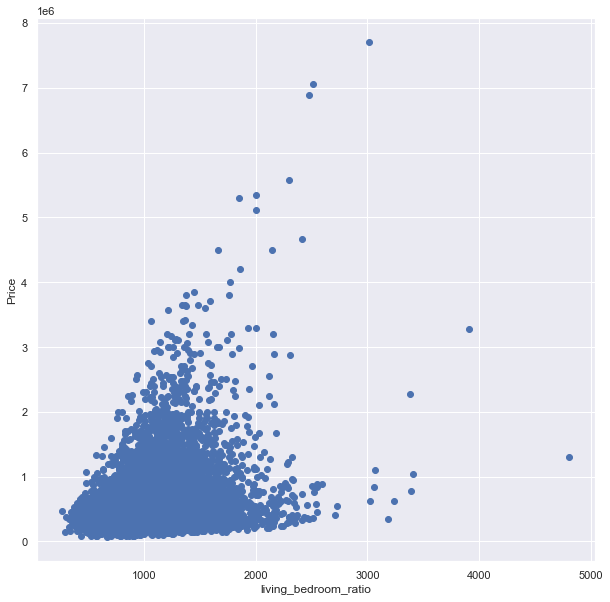

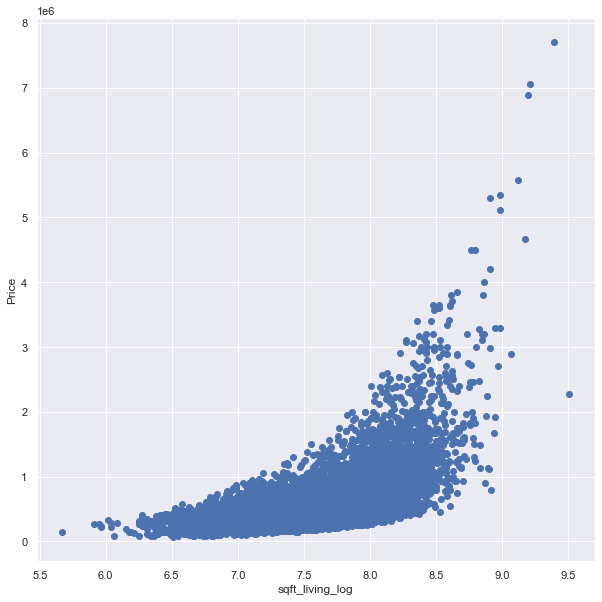

In [72]:
for x in range(df.columns.size):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.scatter(y=df.price,x=df[df.columns[x]])
    ax.set_xlabel(df.columns[x])
    ax.set_ylabel('Price')

In [73]:
df.groupby('floors').size()

floors
1.0    8606
1.5    1524
2.0    6538
2.5     140
3.0     475
3.5       7
dtype: int64

In [74]:
df['floors'] = [3 if x >= 3 else x for x in df.floors]

In [75]:
df.groupby('condition').size()

condition
1       24
2      139
3    11244
4     4516
5     1367
dtype: int64

In [76]:
df['condition'] = [2 if x <= 2 else x for x in df.condition]

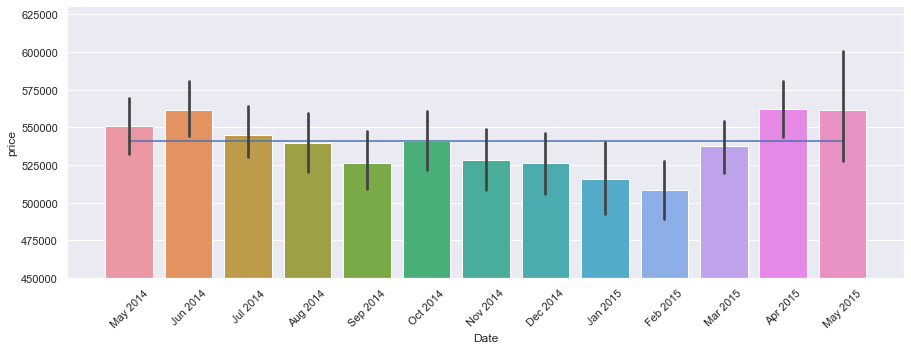

In [77]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df.date, y=df.price, data=df)
ax.ticklabel_format(style='plain', axis='y')
plt.xticks(ticks=np.array(range(13)), labels=['May 2014','Jun 2014', 'Jul 2014', 'Aug 2014','Sep 2014','Oct 2014','Nov 2014', 'Dec 2014','Jan 2015','Feb 2015','Mar 2015', 'Apr 2015', 'May 2015'], rotation = 45)
plt.ylim(bottom=450000)
plt.hlines(df.price.mean(),0, 12, label="Average Price")
ax.set_xlabel('Date');

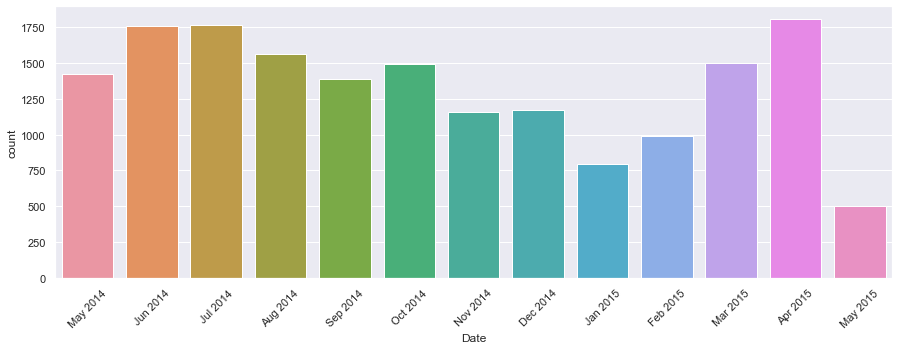

In [78]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=df, x=df.date)
plt.xticks(ticks=np.array(range(13)), labels=['May 2014','Jun 2014', 'Jul 2014', 'Aug 2014','Sep 2014','Oct 2014','Nov 2014', 'Dec 2014','Jan 2015','Feb 2015','Mar 2015', 'Apr 2015', 'May 2015'], rotation = 45)
ax.set_xlabel('Date');


In [79]:
df.date.value_counts(sort=False)

2015-01-01     792
2014-08-01    1561
2015-03-01    1496
2014-11-01    1154
2014-06-01    1753
2014-12-01    1170
2015-02-01     990
2014-07-01    1761
2014-09-01    1388
2015-04-01    1804
2014-10-01    1493
2014-05-01    1423
2015-05-01     505
Name: date, dtype: int64

In [80]:
df['built_by_decade'] = [round(x,-1) for x in df.yr_built]

In [81]:
df.built_by_decade

0        1990
1        1990
2        1990
3        1970
4        2010
         ... 
17285    1950
17286    2000
17287    2010
17288    1940
17289    1920
Name: built_by_decade, Length: 17290, dtype: int64

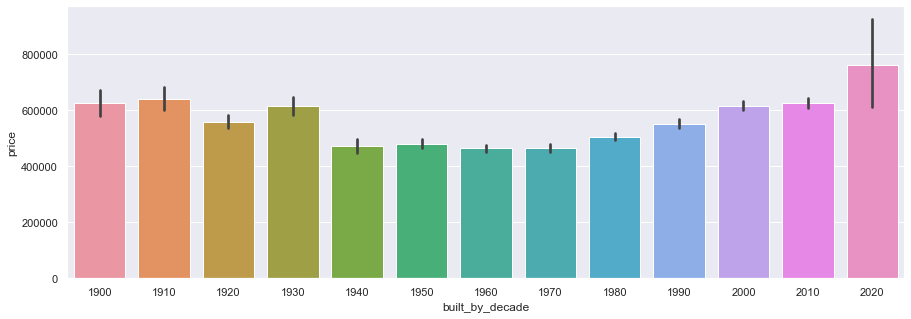

In [82]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df.built_by_decade, y=df.price, data=df)

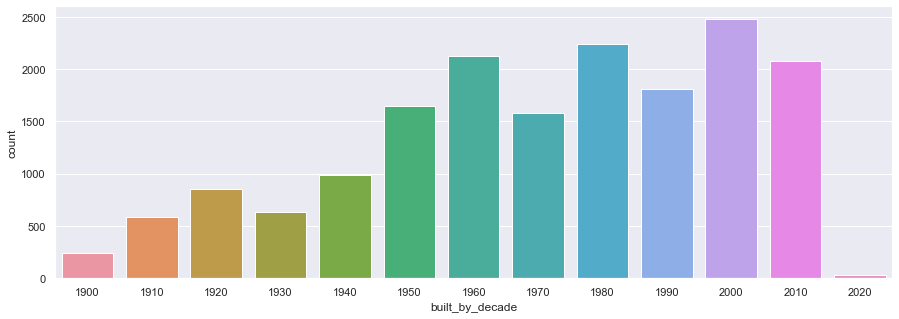

In [83]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data=df, x=df.built_by_decade)

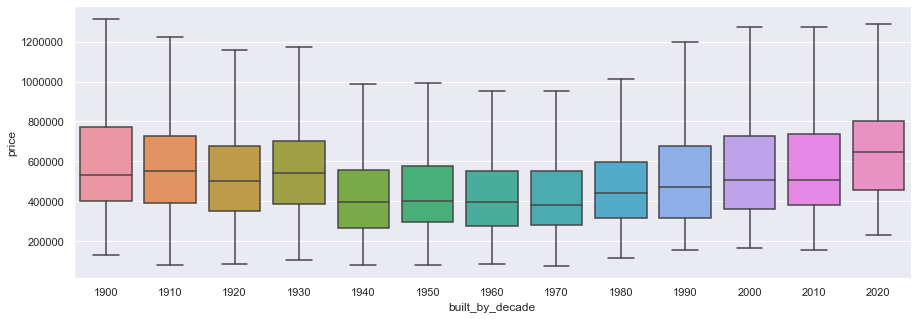

In [84]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df, x=df.built_by_decade, y=df.price, showfliers=False)
ax.ticklabel_format(style='plain', axis='y')

In [85]:
df.built_by_decade.value_counts()

2000    2475
1980    2236
1960    2123
2010    2080
1990    1810
1950    1644
1970    1576
1940     988
1920     856
1930     637
1910     590
1900     246
2020      29
Name: built_by_decade, dtype: int64

In [86]:
df['built_by_decade'] = [2010 if x >= 2020 else x for x in df.built_by_decade]

In [87]:
df['years_from_1970'] = [abs(x-1970) for x in df.built_by_decade]

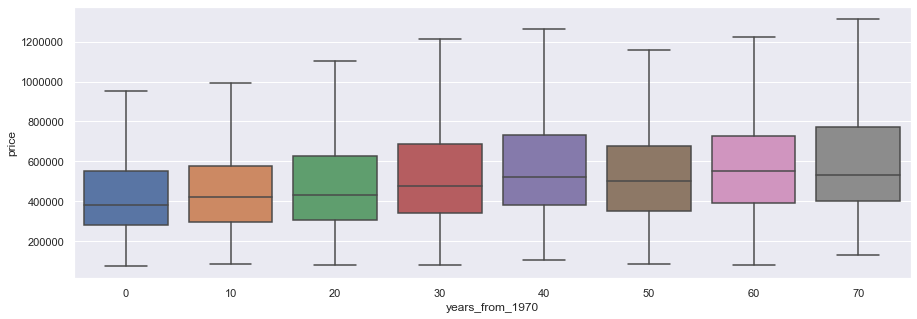

In [88]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data=df, x=df.years_from_1970, y=df.price, showfliers=False)
ax.ticklabel_format(style='plain', axis='y')

In [89]:
df.groupby('years_from_1970').mean().price

years_from_1970
0     463387.193528
10    485382.510209
20    517617.991604
30    575003.194629
40    624001.080845
50    558964.600467
60    641632.906780
70    624689.146341
Name: price, dtype: float64

In [90]:
ols(formula='price~C(years_from_1970)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     58.49
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.35e-83
Time:                        16:32:16   Log-Likelihood:            -2.4616e+05
No. Observations:               17290   AIC:                         4.923e+05
Df Residuals:                   17282   BIC:                         4.924e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 4.634e+05   9296.205     49.847      0.000    4.45e+05    4.82e+05
C(years_from_1970)[T.10]    2.2e+04   1.08e+04      2.028      0.043     733.462    4.33e+04
C(years_from_1970)[T.20]  5.423e+04   1.12e+04      4.834      0.000    3.22e+04    7.62e+04
C(years_from_1970)[T.30]  1.116e+05   1.12e+04      9.953      0.000    8.96e+04    1.34e+05
C(years_from_1970)[T.40]  1.606e+05   1.17e+04     13.772      0.000    1.38e+05    1.83e+05
C(years_from_1970)[T.50]  9.558e+04   1.57e+04      6.100      0.000    6.49e+04    1.26e+05
C(years_from_1970)[T.60]  1.782e+05   1.78e+04     10.007      0.000    1.43e+05    2.13e+05
C(years_from_1970)[T.70]  1.613e+05   2.53e+04      6.376      0.000    1.12e+05    2.11e+05
==============================================================================
Omnibus:                    16075.547   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1144902.899
Skew:                           4.296   Prob(JB):                         0.00
Kurtosis:                      41.928   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
st.f_oneway(df[df['years_from_1970']==0].price,
            df[df['years_from_1970']==10].price,
            df[df['years_from_1970']==20].price,
            df[df['years_from_1970']==30].price,
            df[df['years_from_1970']==40].price,
            df[df['years_from_1970']==50].price,
            df[df['years_from_1970']==60].price,
            df[df['years_from_1970']==70].price)

F_onewayResult(statistic=58.486834071130644, pvalue=2.351034102176135e-83)

In [92]:
ols(formula='price~C(zipcode)+sqft_living+C(waterfront)+C(grade)', data= df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     899.9
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:32:17   Log-Likelihood:            -2.3241e+05
No. Observations:               17290   AIC:                         4.650e+05
Df Residuals:                   17212   BIC:                         4.656e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -5.11e+04   1.52e+04     -3.368      0.001   -8.08e+04   -2.14e+04
C(zipcode)[T.98002]  1.259e+04   1.66e+04      0.757      0.449      -2e+04    4.52e+04
C(zipcode)[T.98003] -1368.3362   1.49e+04     -0.092      0.927   -3.06e+04    2.79e+04
C(zipcode)[T.98004]  7.964e+05   1.48e+04     53.743      0.000    7.67e+05    8.25e+05
C(zipcode)[T.98005]  3.107e+05   1.73e+04     17.951      0.000    2.77e+05    3.45e+05
C(zipcode)[T.98006]  2.844e+05   1.32e+04     21.560      0.000    2.59e+05     3.1e+05
C(zipcode)[T.98007]  2.572e+05   1.81e+04     14.220      0.000    2.22e+05    2.93e+05
C(zipcode)[T.98008]  2.819e+05   1.49e+04     18.930      0.000    2.53e+05    3.11e+05
C(zipcode)[T.98010]  6.596e+04   2.18e+04      3.025      0.002    2.32e+04    1.09e+05
C(zipcode)[T.98011]  1.307e+05   1.64e+04      7.960      0.000    9.85e+04    1.63e+05
C(zipcode)[T.98014]  1.037e+05   1.94e+04      5.354      0.000    6.57e+04    1.42e+05
C(zipcode)[T.98019]  8.456e+04    1.7e+04      4.960      0.000    5.11e+04    1.18e+05
C(zipcode)[T.98022]  4.497e+04   1.57e+04      2.869      0.004    1.42e+04    7.57e+04
C(zipcode)[T.98023] -2.938e+04   1.29e+04     -2.278      0.023   -5.47e+04   -4096.696
C(zipcode)[T.98024]  1.868e+05    2.3e+04      8.132      0.000    1.42e+05    2.32e+05
C(zipcode)[T.98027]  1.639e+05   1.35e+04     12.101      0.000    1.37e+05     1.9e+05
C(zipcode)[T.98028]  1.355e+05    1.5e+04      9.017      0.000    1.06e+05    1.65e+05
C(zipcode)[T.98029]  2.121e+05   1.46e+04     14.540      0.000    1.84e+05    2.41e+05
C(zipcode)[T.98030]   -55.6580   1.54e+04     -0.004      0.997   -3.02e+04    3.01e+04
C(zipcode)[T.98031]  1.462e+04   1.51e+04      0.969      0.333    -1.5e+04    4.42e+04
C(zipcode)[T.98032]  1.342e+04   1.92e+04      0.699      0.485   -2.42e+04    5.11e+04
C(zipcode)[T.98033]  3.678e+05   1.33e+04     27.585      0.000    3.42e+05    3.94e+05
C(zipcode)[T.98034]  2.064e+05   1.27e+04     16.195      0.000    1.81e+05    2.31e+05
C(zipcode)[T.98038]  2.951e+04   1.26e+04      2.336      0.020    4747.581    5.43e+04
C(zipcode)[T.98039]  1.301e+06   2.79e+04     46.703      0.000    1.25e+06    1.36e+06
C(zipcode)[T.98040]  5.151e+05    1.5e+04     34.342      0.000    4.86e+05    5.45e+05
C(zipcode)[T.98042]  1.401e+04   1.28e+04      1.094      0.274   -1.11e+04    3.91e+04
C(zipcode)[T.98045]  1.103e+05    1.6e+04      6.885      0.000    7.89e+04    1.42e+05
C(zipcode)[T.98052]  2.338e+05   1.26e+04     18.576      0.000    2.09e+05    2.59e+05
C(zipcode)[T.98053]  2.017e+05   1.36e+04     14.799      0.000    1.75e+05    2.28e+05
C(zipcode)[T.98055]  4.564e+04   1.52e+04      3.003      0.003    1.59e+04    7.54e+04
C(zipcode)[T.98056]  9.879e+04   1.35e+04      7.333      0.000    7.24e+04    1.25e+05
C(z

In [93]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,second_sale,is_renovated,house_age,has_basement,season,yard_space,sqft_per_floor,floor_area_lot_ratio,living_bathroom_ratio,living_bedroom_ratio,sqft_living_log,built_by_decade,years_from_1970
0,2014-05-01,257950.0,1.75,1.75,1370,5858,1.0,0,0,3,7,1370,0,1987,0,98198,47.3815,-122.313,1400,7500,0,0,28,0,Spring,4488.0,1370.0,0.233868,782.857143,782.857143,7.222566,1990,20
1,2014-05-01,439950.0,2.50,2.50,1770,2875,2.0,0,0,3,8,1770,0,1990,0,98116,47.5631,-122.397,1770,3833,0,0,25,0,Spring,1990.0,885.0,0.307826,708.000000,708.000000,7.478735,1990,20
2,2014-05-01,287200.0,3.00,3.00,1850,19966,1.0,0,0,4,7,1090,760,1992,0,98038,47.3493,-122.034,1410,6715,0,0,23,1,Spring,18116.0,1850.0,0.092658,616.666667,616.666667,7.522941,1990,20
3,2014-05-01,260000.0,2.00,2.00,1480,8625,1.0,0,0,4,7,1480,0,1974,0,98055,47.4620,-122.193,2130,8502,0,0,41,0,Spring,7145.0,1480.0,0.171594,740.000000,740.000000,7.299797,1970,0
4,2014-05-01,459990.0,2.50,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4761,-121.734,2990,6037,0,0,2,0,Spring,4199.0,1340.0,0.241921,1072.000000,1072.000000,7.893572,2010,40


In [94]:
#df['zipcode'] = [str(x) for x in df.zipcode]
#df['grade'] = [str(x) for x in df.grade]
#df['waterfront'] = [str(x) for x in df.waterfront]
#df['years_from_1970'] = [str(x) for x in df.years_from_1970]
#df['bedrooms'] = [str(x) for x in df.bedrooms]
#df['bathrooms'] = [str(x) for x in df.bathrooms]
#df['date'] = [str(x) for x in df.date]
#df['floors'] = [str(x) for x in df.floors]
#df['waterfront'] = [str(x) for x in df.waterfront]
#df['view'] = [str(x) for x in df.view]
#df['condition'] = [str(x) for x in df.condition]
#df['second_sale'] = [str(x) for x in df.second_sale]
#df['is_renovated'] = [str(x) for x in df.is_renovated]
#df['has_basement'] = [str(x) for x in df.has_basement]
#df['built_by_decade'] = [str(x) for x in df.built_by_decade]

In [95]:
df = pd.get_dummies(df, columns =['zipcode', 'grade', 'years_from_1970', 'bedrooms', 'bathrooms', 'date', 'floors', 'waterfront', 'view', 'condition', 'built_by_decade','season'], drop_first=True)

In [96]:
df.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15',
       ...
       'built_by_decade_1950', 'built_by_decade_1960', 'built_by_decade_1970',
       'built_by_decade_1980', 'built_by_decade_1990', 'built_by_decade_2000',
       'built_by_decade_2010', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object', length=163)

In [97]:
df.drop(['zipcode_98002', 'zipcode_98003', 'zipcode_98030', 'zipcode_98031','zipcode_98032',  'zipcode_98042', 'zipcode_98092', 'zipcode_98188', 'zipcode_98198'], axis=1, inplace=True)

In [98]:
target=df['price']
df_features = df.drop(['price', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)

In [99]:
df_features.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'second_sale', 'is_renovated',
       'house_age', 'has_basement', 'yard_space', 'sqft_per_floor',
       'floor_area_lot_ratio',
       ...
       'built_by_decade_1950', 'built_by_decade_1960', 'built_by_decade_1970',
       'built_by_decade_1980', 'built_by_decade_1990', 'built_by_decade_2000',
       'built_by_decade_2010', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object', length=146)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target, random_state=1,test_size=.3)

In [101]:
lm = LinearRegression()

In [102]:
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("R^2 Score:", lm.score(X_train, y_train))

2312110.692061352
[ 2.92974687e+02  2.43150179e+03  4.47958846e+01 -1.04769826e+04
  6.75095421e+04 -1.57976473e+03  1.09242261e+04 -2.43144719e+03
 -2.46905125e+03 -1.87454612e+05  3.08272106e+01  3.08266143e+01
 -3.63666759e+05  7.95968308e+05  2.89061720e+05  2.57855593e+05
  2.69729980e+05  2.58800198e+05  6.52795325e+04  1.44667583e+05
  8.93728493e+04  8.51218506e+04 -1.03699159e+04 -2.27638856e+04
  1.38537520e+05  1.65766147e+05  1.37574587e+05  2.30833498e+05
  3.51185514e+05  2.04933926e+05  3.20867048e+04  1.24287921e+06
  4.86673798e+05  8.45055329e+04  2.51187807e+05  1.97457778e+05
  5.15152564e+04  9.33159794e+04  3.75026509e+04  7.26897608e+04
  9.37134706e+04  1.29881190e+04  1.61143889e+05  1.86113506e+05
  1.75458345e+05  1.10001607e+05  5.63977544e+05  3.66928988e+05
  5.03631322e+05  1.15359031e+05  3.76394923e+05  1.32140538e+05
  5.15672642e+05  6.48170181e+05  3.49737157e+05  3.02632582e+05
  3.36050544e+05  1.73660578e+05  5.17620457e+05  3.72118195e+05
  2.058

In [103]:
y_train_pred = lm.predict(X_train)

In [104]:
y_train_pred

array([ 332395.47994474,  299020.54898646, 1110457.51907045, ...,
        406825.87052487,  323242.37282358, 1048100.25555694])

In [105]:
train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Mean Absolute Error:', train_mae )
print('Mean Squared Error:',  train_mse)
print('Root Mean Squared Error:' , train_rmse)

Mean Absolute Error: 90301.3412742084
Mean Squared Error: 24245478308.940258
Root Mean Squared Error: 155709.59607211195


In [106]:
y_pred = lm.predict(X_test)

In [107]:
print ("Score:", lm.score(X_test, y_test))

Score: 0.8409193197545477


In [108]:
test_mae = metrics.mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


print('Mean Absolute Error:' + str(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error:' + str(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:' + str(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error:87856.5776048314
Mean Squared Error:21786128673.912704
Root Mean Squared Error:147601.24889008462


In [109]:
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Training:  155709 vs. Testing:  147601


In [110]:
residuals = (y_test- y_pred)

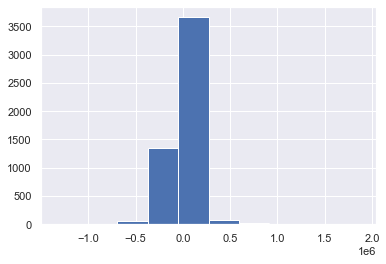

In [111]:
plt.hist(residuals);


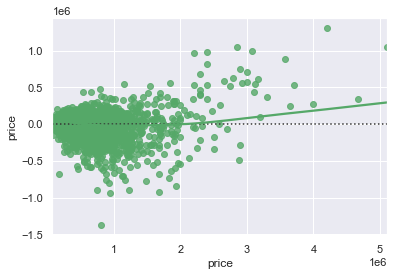

In [112]:
sns.residplot(x=y_test, y=residuals, lowess=True, color="g");

In [113]:
lm_log_model = LinearRegression()

In [114]:
y_log_train = np.log(y_train)
lm_log_model.fit(X_train, y_log_train)

LinearRegression()

In [115]:
y_log_train_preds = lm_log_model.predict(X_train)
y_log_train_preds = np.exp(y_log_train_preds)

log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_preds)
log_train_mse = metrics.mean_squared_error(y_train, y_log_train_preds)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_preds))

In [116]:
y_log_test_preds = lm_log_model.predict(X_test)
y_log_test_preds = np.exp(y_log_test_preds)

log_test_mae = metrics.mean_absolute_error(y_test, y_log_test_preds)
log_test_mse = metrics.mean_squared_error(y_test, y_log_test_preds)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_test_preds))

In [117]:
log_train_rmse, log_test_rmse

(126563.1299669537, 128292.74026013653)

In [118]:
residuals = (y_test - y_log_test_preds)

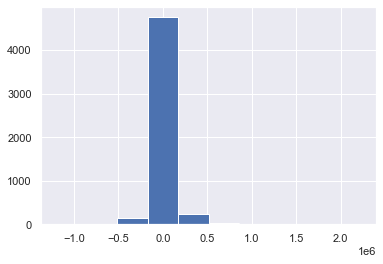

In [119]:
plt.hist(residuals);

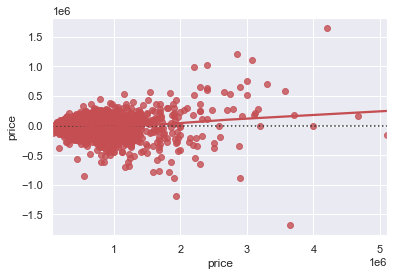

In [120]:
sns.residplot(x=y_test, y=residuals, lowess=True, color='r');

In [121]:
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [122]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

X_train_corr = X_train.drop(columns=to_drop, inplace=False, axis=1)
X_test_corr = X_test.drop(columns=to_drop, inplace=False, axis=1)

In [123]:
len(to_drop)

16

In [124]:
to_drop

['yard_space',
 'living_bedroom_ratio',
 'sqft_living_log',
 'bathrooms_1.5',
 'bathrooms_1.75',
 'bathrooms_2.0',
 'bathrooms_2.25',
 'bathrooms_2.5',
 'bathrooms_2.75',
 'bathrooms_3.0',
 'bathrooms_3.25',
 'bathrooms_3.5',
 'bathrooms_3.75',
 'bathrooms_4.0',
 'built_by_decade_1910',
 'built_by_decade_1920']

In [125]:
lnAll_corr_log = LinearRegression()

y_log_train = np.log(y_train)
lnAll_corr_log.fit(X_train_corr, y_log_train)

y_log_train_preds = lnAll_corr_log.predict(X_train_corr)
y_log_train_preds = np.exp(y_log_train_preds)

log_train_mae = metrics.mean_absolute_error(y_train, y_log_train_preds)
log_train_mse = metrics.mean_squared_error(y_train, y_log_train_preds)
log_train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_log_train_preds))

y_log_test_preds = lnAll_corr_log.predict(X_test_corr)

y_log_test_preds = np.exp(y_log_test_preds)

log_test_mae = metrics.mean_absolute_error(y_test, y_log_test_preds)
log_test_mse = metrics.mean_squared_error(y_test, y_log_test_preds)
log_test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_log_test_preds))

log_train_rmse, log_test_rmse

(133643.99553331808, 129462.95022383098)

In [126]:
residuals = (y_test - y_log_test_preds)

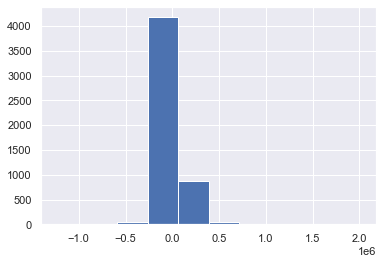

In [127]:
plt.hist(residuals);

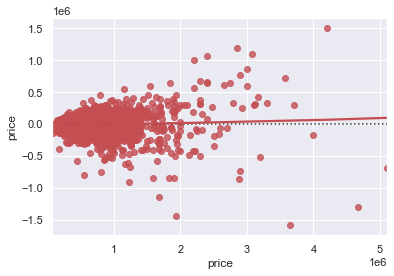

In [128]:
sns.residplot(x=y_test, y=residuals, lowess=True, color='r');

In [129]:
ols = LinearRegression()

selector = RFECV(estimator=ols, step=2, cv=7, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

 
selector.fit(X_train, y_train)

Fitting estimator with 146 features.
Fitting estimator with 144 features.


RFECV(cv=7, estimator=LinearRegression(), n_jobs=-1,
      scoring='neg_mean_squared_error', step=2, verbose=1)

In [130]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [131]:
X_train_rfe = X_train.drop(columns=removed_rfe, inplace=False, axis=1)
X_test_rfe = X_test.drop(columns=removed_rfe, inplace=False, axis=1)

In [132]:
lm_rfe = LinearRegression()

lm_rfe = lm_rfe.fit(X_train_rfe, y_train)

y_rfe = lm_rfe.predict(X_train_rfe)

trainRFE_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_rfe))


print('Training Root Mean Squared Error:' , trainRFE_rmse)

y_pred_rfe = lm_rfe.predict(X_test_rfe)

testRFE_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))

print('Testing Root Mean Squared Error:' , testRFE_rmse)



Training Root Mean Squared Error: 166139.7671433981
Testing Root Mean Squared Error: 152199.21640027667


In [133]:
removed_rfe

Index(['sqft_living', 'sqft_above', 'living_bathroom_ratio',
       'living_bedroom_ratio'],
      dtype='object')

In [134]:
residuals = (y_test - y_pred_rfe)

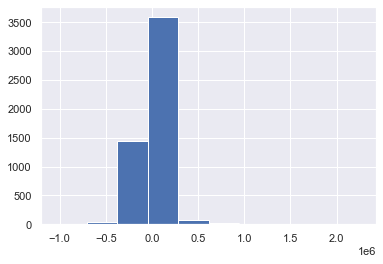

In [135]:
plt.hist(residuals);

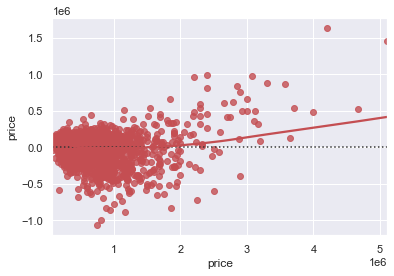

In [136]:
sns.residplot(x=y_test, y=residuals, lowess=True, color='r');

In [137]:
columns = X_train.columns

In [138]:
len(columns)

146

In [142]:
final_model = LinearRegression()

In [143]:
log_price = df.price
final_model.fit(df[columns], log_price)

LinearRegression()

In [144]:
pickle_out = open("model.pickle","wb")
pickle.dump(final_model, pickle_out)
pickle_out.close()


pickle_out = open("columns.pickle","wb")
pickle.dump(columns, pickle_out)
pickle_out.close()
